## **Importing Libraries**

In [249]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import mutual_info_classif
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report
import numpy as np
from scipy.stats import zscore
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras import layers, models
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from statistics import mode
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

# **Loading Dataset**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
Data_set = pd.read_csv('/content/drive/MyDrive/Data Set/Dataset.csv.csv')

# **Description about the Dataset**

In [ ]:
#Displaying the first five rows of the data set
Data_set.head()

Customer ID  Churn  Monthly Revenue  Monthly Minutes  \
0      1000002      0        57.492500           482.75   
1      1000006      0        82.275002          1312.25   
2      1000010      0        31.662500            25.50   
3      1000011      0        62.127499            97.50   
4      1000014      0        25.225000             2.50   

   Total Recurring Charge  Director Assisted Calls  Overage Minutes  \
0               37.424999                   0.2475            22.75   
1               75.000000                   1.2375             0.00   
2               29.990000                   0.2475             0.00   
3               65.985001                   2.4750             0.00   
4               25.000000                   0.0000             0.00   

   Roaming Calls  PercChangeMinutes  PercChangeRevenues  ...  HasCreditCard  \
0            0.0             532.25           50.987499  ...              1   
1            0.0             156.75            8.145000  ...              1   
2            0.0              59.50            4.027500  ...              1   
3            0.0              23.50            6.822500  ...              1   
4            0.0              -2.50           -0.225000  ...              0   

   Retention Calls  RetentionOffersAccepted  NewCellphoneUser  \
0                0                        0                 0   
1                0                        0                 1   
2                0                        0                 0   
3                0                        0                 1   
4                0                        0                 1   

   NotNewCellphoneUser  ReferralsMadeBySubscriber  IncomeGroup  \
0                    1                          0            5   
1                    0                          0            6   
2                    1                          0            9   
3                    0                          0            6   
4                    0                          0            7   

   OwnsMotorCycle  HandsetPrice  MadeCallToRetentionTeam  
0               0    149.989990                        0  
1               0      9.989998                        0  
2               0     29.989990                        0  
3               0     29.989990                        0  
4               0     29.989990                        0  

[5 rows x 59 columns]

In [ ]:
#Displaying the total number of rows and columns of data set
Data_set.shape

(65533, 59)

In [ ]:
#Displaying column names of data set
Data_set.columns

Index(['Customer ID', 'Churn', 'Monthly Revenue', 'Monthly Minutes',
       'Total Recurring Charge', 'Director Assisted Calls', 'Overage Minutes',
       'Roaming Calls', 'PercChangeMinutes', 'PercChangeRevenues',
       'Dropped Calls', 'Blocked Calls', 'Unanswered Calls',
       'Customer Care Calls', 'Threeway Calls', 'Received Calls',
       'Outbound Calls', 'Inbound Calls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'Dropped Blocked Calls', 'Call Forwarding Calls',
       'CallWaiting Calls', 'Months In Service', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'Handsets models', 'Current Equipment Days', 'ageHH1',
       'ageHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
       'TruckOwner', 'RVOwner', 'Occupation Professional',
       'Occupation Clerical', 'Occupation Crafts', 'Occupation Student',
       'Occupation Other', 'Occupation Retired', 'Occupation Self',
       'Homeownership', 'Unmarried', 'Married', 'RespondsToMailOffers',
       'NonUSTravel',

Customer Id column does not contain any valuable information. Dropping the column "Customer ID".

In [ ]:
#Dropping Customer ID Column
df = Data_set.drop(['Customer ID'], axis=1)

In [ ]:
#Displaying the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65533 entries, 0 to 65532
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      65533 non-null  int64  
 1   Monthly Revenue            65364 non-null  float64
 2   Monthly Minutes            65364 non-null  float64
 3   Total Recurring Charge     65364 non-null  float64
 4   Director Assisted Calls    65364 non-null  float64
 5   Overage Minutes            65364 non-null  float64
 6   Roaming Calls              65364 non-null  float64
 7   PercChangeMinutes          65143 non-null  float64
 8   PercChangeRevenues         65143 non-null  float64
 9   Dropped Calls              65533 non-null  float64
 10  Blocked Calls              65533 non-null  float64
 11  Unanswered Calls           65533 non-null  float64
 12  Customer Care Calls        65533 non-null  float64
 13  Threeway Calls             65533 non-null  flo

In [ ]:
#Describing the statistical measures of data set
df.describe(include="all").T

count        mean         std         min  \
Churn                      65533.0    0.230342    0.421055     0.00000   
Monthly Revenue            65364.0   58.807183   44.032836    -6.16750   
Monthly Minutes            65364.0  522.313269  528.531729     0.00000   
Total Recurring Charge     65364.0   46.851624   23.978717    -8.71000   
Director Assisted Calls    65364.0    0.897582    2.205947     0.00000   
Overage Minutes            65364.0   39.747458   96.410719     0.00000   
Roaming Calls              65364.0    1.186677    8.569158     0.00000   
PercChangeMinutes          65143.0   -9.154806  249.699304 -3875.00000   
PercChangeRevenues         65143.0   -1.180171   37.382755 -1107.73999   
Dropped Calls              65533.0    5.950979    8.888736     0.00000   
Blocked Calls              65533.0    4.023184   10.503640     0.00000   
Unanswered Calls           65533.0   28.083391   38.528766     0.00000   
Customer Care Calls        65533.0    1.825042    5.144815     0.00000   
Threeway Calls             65533.0    0.296939    1.160201     0.00000   
Received Calls             65533.0  114.740295  166.281467     0.00000   
Outbound Calls             65533.0   25.360119   34.964341     0.00000   
Inbound Calls              65533.0    8.188943   16.519571     0.00000   
PeakCallsInOut             65533.0   90.985501  105.273399     0.00000   
OffPeakCallsInOut          65533.0   67.293732   92.837516     0.00000   
Dropped Blocked Calls      65533.0   10.046025   15.253541     0.00000   
Call Forwarding Calls      65533.0    0.012253    0.578727     0.00000   
CallWaiting Calls          65533.0    1.847026    5.564954     0.00000   
Months In Service          65533.0   19.284452    9.771861     6.00000   
UniqueSubs                 65533.0    1.524820    1.146417     1.00000   
ActiveSubs                 65533.0    1.351350    0.663453     0.00000   
Handsets                   65532.0    1.836278    1.360248     1.00000   
Handsets models            65532.0    1.580831    0.921685     1.00000   
Current Equipment Days     65532.0  387.590170  257.928501    -5.00000   
ageHH1                     64431.0   31.643852   21.981588     0.00000   
ageHH2                     64431.0   21.364561   23.946954     0.00000   
ChildrenInHH               65533.0    0.243145    0.428985     0.00000   
HandsetRefurbished         65533.0    0.142020    0.349073     0.00000   
HandsetWebCapable          65533.0    0.898723    0.301698     0.00000   
TruckOwner                 65533.0    0.190637    0.392806     0.00000   
RVOwner                    65533.0    0.082966    0.275833     0.00000   
Occupation Professional    65533.0    0.175698    0.380566     0.00000   
Occupation Clerical        65533.0    0.020143    0.140489     0.00000   
Occupation Crafts          65533.0    0.029436    0.169025     0.00000   
Occupation Student         65533.0    0.007767    0.087789     0.00000   
Occupation Other           65533.0    0.003189    0.056384     0.00000   
Occupation Retired         65533.0    0.014680    0.120268     0.00000   
Occupation Self            65533.0    0.018250    0.133856     0.00000   
Homeownership              65533.0    0.325317    0.468497     0.00000   
Unmarried                  65533.0    0.379442    0.485252     0.00000   
Married                    65533.0    0.368105    0.482294     0.00000   
RespondsToMailOffers       65533.0    0.365953    0.481700     0.00000   
NonUSTravel                65533.0    0.058352    0.234410     0.00000   
OwnsComputer               65533.0    0.187615    0.390408     0.00000   
HasCreditCard              65533.0    0.683701    0.465035     0.00000   
Retention Calls            65533.0    0.036272    0.203985     0.00000   
RetentionOffersAccepted    65533.0    0.017976    0.141755     0.00000   
NewCellphoneUser           65533.0    0.198236    0.398674     0.00000   
NotNewCellphoneUser        65533.0    0.143638    0.350725     0.00000   
ReferralsMadeBySubscriber  65533.

In [ ]:
#Displaying the unique values inside the Churn column
df["Churn"].unique()

array([0, 1])

In [ ]:
#Displaying the count of churn and non-churn
print(df.Churn.value_counts())

0    50438
1    15095
Name: Churn, dtype: int64


# **Exploratory Data Analysis**

**Visualising Churn vs Non-churn distribution by Bar graph**

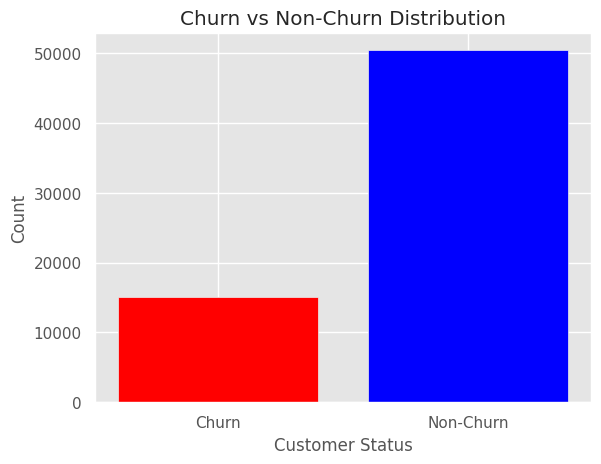

In [ ]:
# Creating bar graph
churn_count = 15095
non_churn_count = 50438
data = [churn_count, non_churn_count]
labels = ['Churn', 'Non-Churn']
colors = ['red', 'blue']

# Plotting Bar plot
plt.bar(labels, data, color=colors)

# Adding labels and title
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Churn vs Non-Churn Distribution')

# Showing the plot
plt.show()


**Visualising Churn vs Non-churn distribution by Donut Chart**

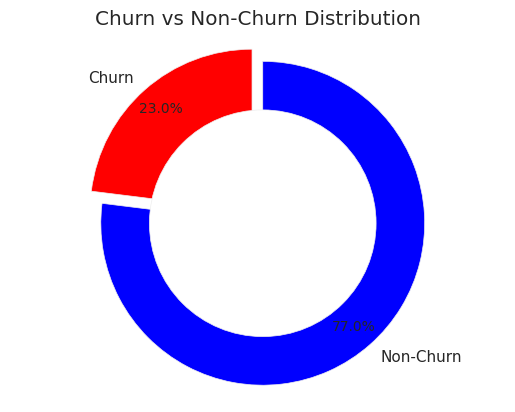

In [ ]:
churn_count = 15095
non_churn_count = 50438
data = [churn_count, non_churn_count]
labels = ['Churn', 'Non-Churn']
colors = ['red', 'blue']
# Exploding the first slice for emphasis
explode = (0.1, 0)
# Creating the donut chart
fig, ax = plt.subplots()
ax.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
# Ensuring that pie is drawn as a circle.
ax.axis('equal')
plt.title("Churn vs Non-Churn Distribution")
plt.show()


77% of the customers are not churned and 23% of the customers are churned.

**Visualising Distribution of Unique and Active Subscribers**

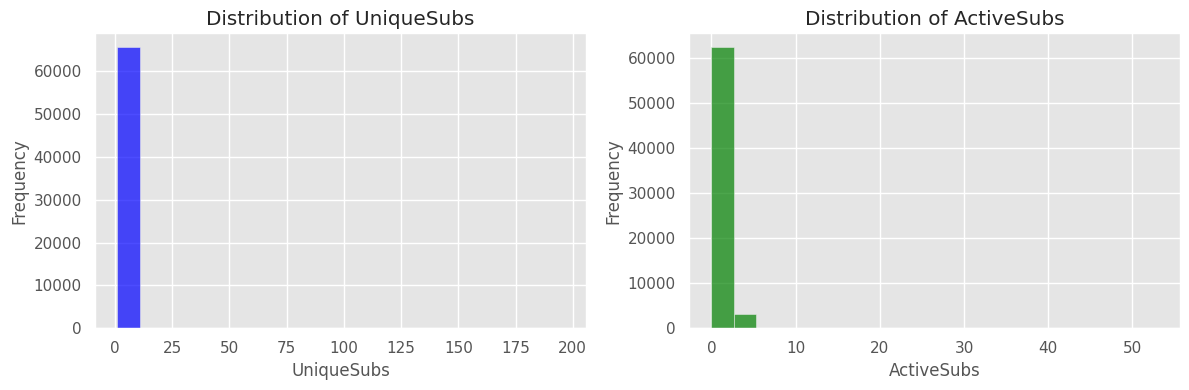

In [ ]:
# Creating a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotting for UniqueSubs
ax1.hist(df['UniqueSubs'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Distribution of UniqueSubs')
ax1.set_xlabel('UniqueSubs')
ax1.set_ylabel('Frequency')

# Plotting for ActiveSubs
ax2.hist(df['ActiveSubs'], bins=20, color='green', alpha=0.7)
ax2.set_title('Distribution of ActiveSubs')
ax2.set_xlabel('ActiveSubs')
ax2.set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()

# Showing the plots
plt.show()


**Insights derived:**

The graph shows a distribution of unique subs and active subs. It shows that the majority of customers have a small number of subscriptions.

The graph also shows that the number of active subs is lower than the number of unique subs. This suggests that not all customers are using all of their subscriptions.

Overall, the graph shows that the majority of customers have a small number of subscriptions, and that not all customers are using all of their subscriptions. Businesses should focus on retaining both unique subs and active subs, as they both contribute to the overall revenue of the business.

The mean number of subscriptions for unique subs is lower than the mean number of subscriptions for active subs. This suggests that active subs tend to have more subscriptions than unique subs.

The number of active subs decreases as the number of subscriptions increases. This suggests that customers are less likely to use all of their subscriptions as they have more subscriptions.

Businesses should focus on retaining active subs, as they are more likely to generate revenue for the business.

**Visualising Percentage of Subscribers Churned**

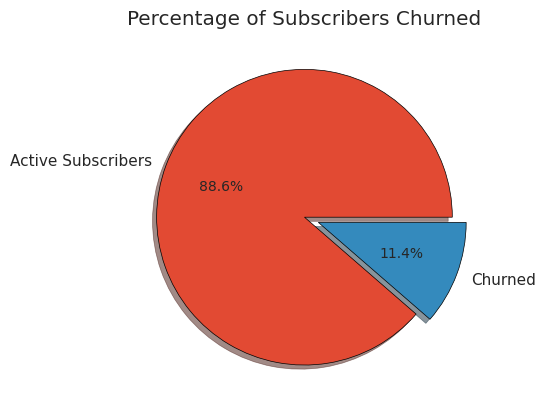

In [ ]:
#Determining Churned Subscribers
df['ChurnSubs']=df['UniqueSubs']-df['ActiveSubs']

slices = [df['ActiveSubs'].sum(), df['ChurnSubs'].sum()]
labels = ['Active Subscribers', 'Churned']
explode = [0, 0.1]

plt.pie(slices, labels=labels, explode=explode, wedgeprops={'edgecolor': 'black'}, shadow=True, autopct='%1.1f%%')
plt.title("Percentage of Subscribers Churned")

# Displaying the pie chart
plt.show()


There is no specific column of  churned subscribers, which can be determined by subtracting the number of unique and active subscribers.

Therefore, 11.4% of the subscribers are churned.

**Visualising Customers per Income Group**

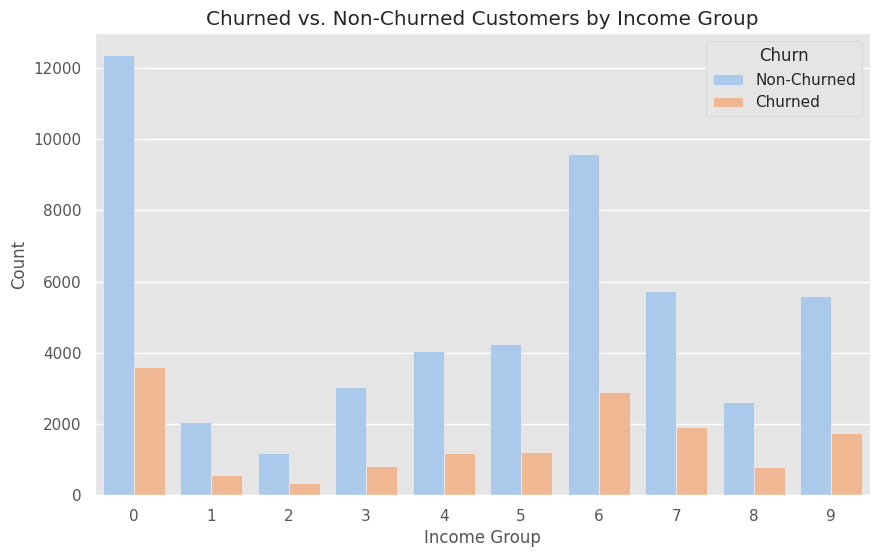

In [ ]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='IncomeGroup', hue='Churn', data=df, palette='pastel')

# Setting labels and title
plt.title('Churned vs. Non-Churned Customers by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Adding a legend
plt.legend(title='Churn', loc='upper right', labels=['Non-Churned', 'Churned'])

# Showing the plot
plt.show()


**Visualising Frequency Distribution of Different Categorical Variables**

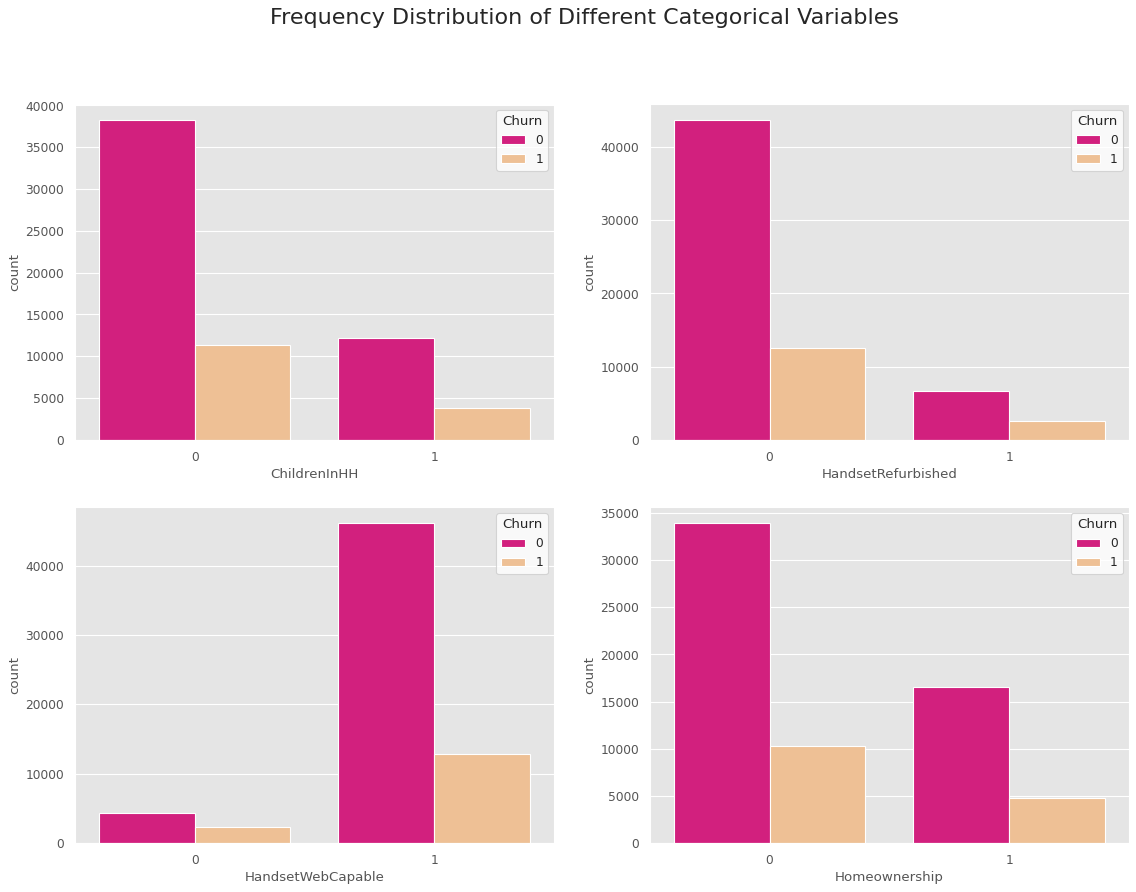

In [ ]:
def Distribution_plot(df):
    fig, axarr = plt.subplots(2,2, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')
    sns.set(style="white")
    sns.countplot(x='ChildrenInHH', hue = 'Churn',data = df, ax=axarr[0][0], palette="Accent_r")
    sns.countplot(x='HandsetRefurbished', hue = 'Churn',data = df, ax=axarr[0][1], palette="Accent_r")
    sns.countplot(x='HandsetWebCapable', hue = 'Churn',data = df,ax=axarr[1][0], palette="Accent_r")
    sns.countplot(x='Homeownership', hue = 'Churn',data = df, ax=axarr[1][1], palette="Accent_r")
    fig.suptitle('Frequency Distribution of Different Categorical Variables',fontsize = 20);
    plt.show()
Distribution_plot(df)


**Insights derived:**

*   Households without children have more number of churned customers.
*   Customers whose handsets are web capable are more churned.
*   Customers whose handsets are not refurbished are more churned.
*   Customers without homeownership are more churned.

Cell phone providers can use these insights to develop strategies for reducing churn and increasing customer retention by oroviding excellent customer service to households without children, customers whose handsets are web capable, customers whose handsets are not refurbished, and customers without homeownership.

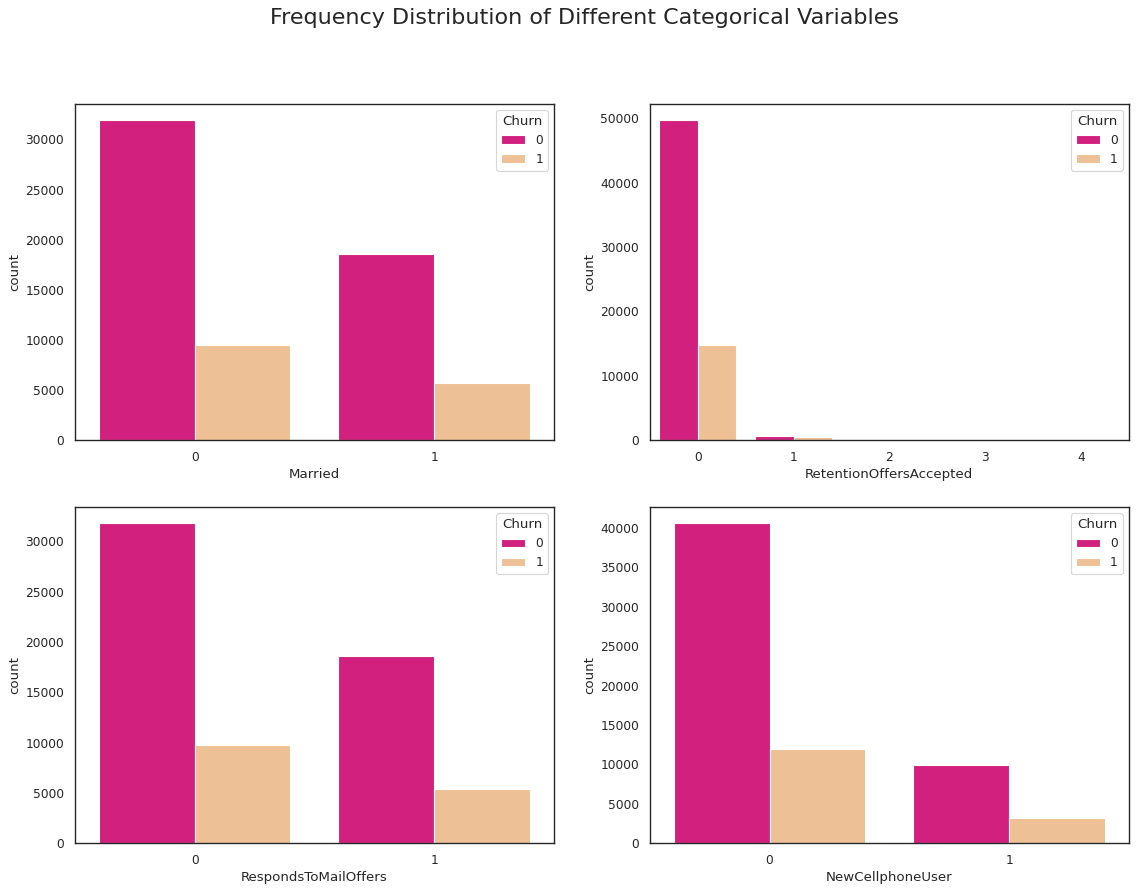

In [ ]:
def Distribution_plot2(df):
    fig, axarr = plt.subplots(2,2, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')
    sns.set(style="white")
    sns.countplot(x='Married', hue='Churn', data=df, ax=axarr[0][0], palette="Accent_r")
    sns.countplot(x='RetentionOffersAccepted', hue='Churn', data=df, ax=axarr[0][1], palette="Accent_r")
    sns.countplot(x='RespondsToMailOffers', hue='Churn', data=df, ax=axarr[1][0], palette="Accent_r")
    sns.countplot(x='NewCellphoneUser', hue='Churn', data=df, ax=axarr[1][1], palette="Accent_r")
    fig.suptitle('Frequency Distribution of Different Categorical Variables',fontsize = 20);
    plt.show()
Distribution_plot2(df)

**Insights derived:**


*   Customers who are unmarried are more churned.
*   Customers who are not new cell phone users are more churned.
*   Customers who have not accepted retention offers are more churned.
*   Customers who do not respond to mail offers are more churned.

Overall, the insights derived suggest that cell phone providers should focus on retaining unmarried customers, existing customers, customers who have not accepted retention offers, and customers who do not respond to mail offers. These customers are more likely to churn, so it is important to provide them with excellent customer service and targeted marketing campaigns.










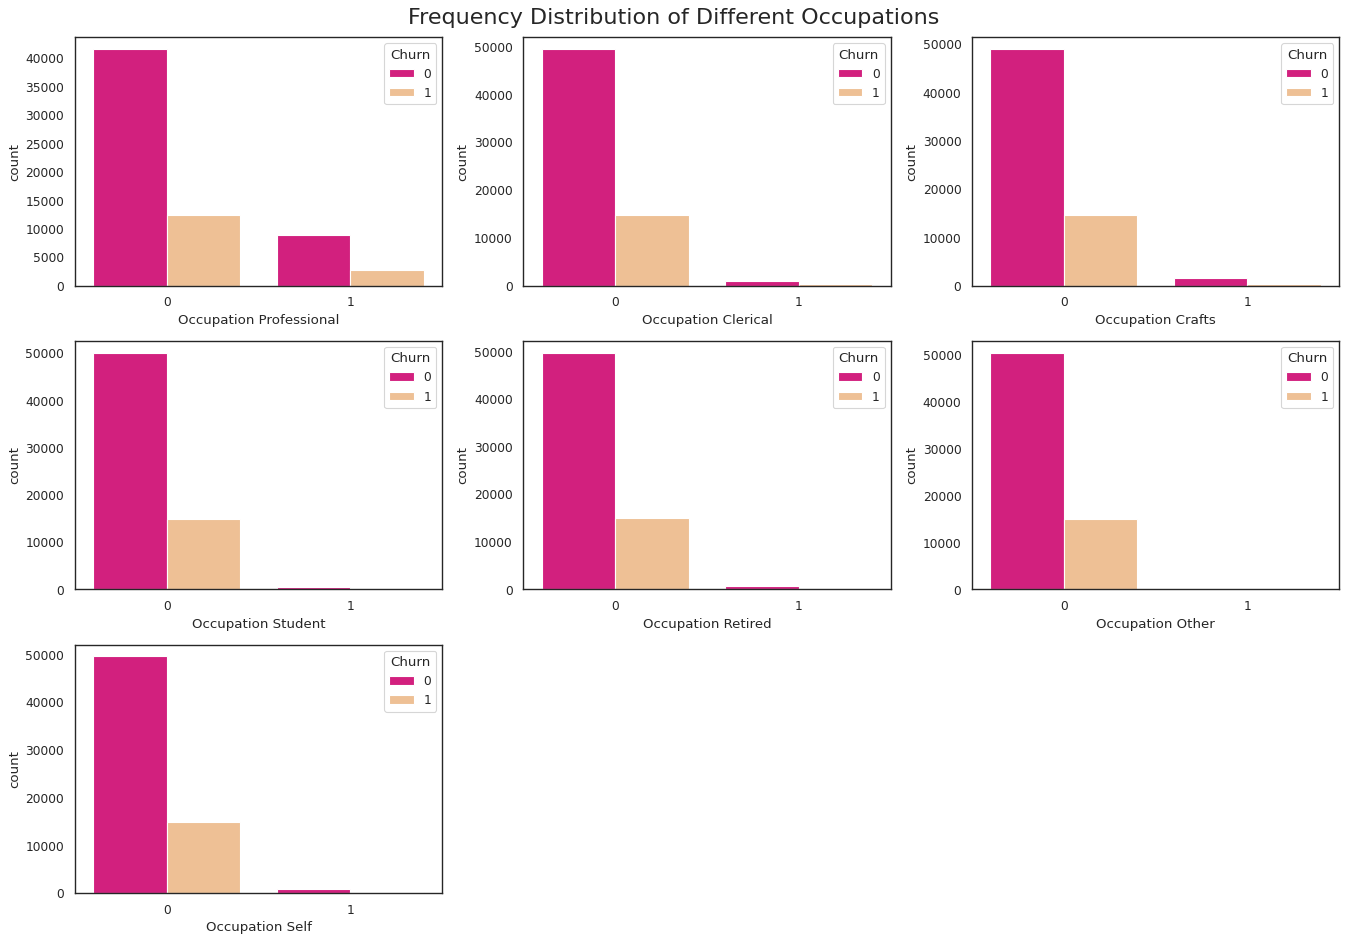

In [ ]:
def Distribution_plot1(df):
    fig, axarr = plt.subplots(3, 3, figsize=(17, 12), dpi=80, facecolor='w', edgecolor='k')
    sns.set(style="white")

    sns.countplot(x='Occupation Professional', hue='Churn', data=df, ax=axarr[0][0], palette="Accent_r")
    sns.countplot(x='Occupation Clerical', hue='Churn', data=df, ax=axarr[0][1], palette="Accent_r")
    sns.countplot(x='Occupation Crafts', hue='Churn', data=df, ax=axarr[0][2], palette="Accent_r")
    sns.countplot(x='Occupation Student', hue='Churn', data=df, ax=axarr[1][0], palette="Accent_r")
    sns.countplot(x='Occupation Retired', hue='Churn', data=df, ax=axarr[1][1], palette="Accent_r")
    sns.countplot(x='Occupation Other', hue='Churn', data=df, ax=axarr[1][2], palette="Accent_r")
    sns.countplot(x='Occupation Self', hue='Churn', data=df, ax=axarr[2][0], palette="Accent_r")

    # Removing the empty subplots
    fig.delaxes(axarr[2][1])
    fig.delaxes(axarr[2][2])

    fig.suptitle('Frequency Distribution of Different Occupations', fontsize=20);
    plt.tight_layout()
    plt.show()

Distribution_plot1(df)

**Insights derived**

*   Customers who are working as professionals are less churned.
*   Customers who are working as clerks are less churned.
*   Customers who are working in crafts are less churned.
*   Students are less churned.
*   Customers who are retired are less churned.
*   Customers who are self employed are less churned.
*   Customers who are working in other occupation are less churned.
*  The graph shows that customers in all occupation categories are less likely to churn than customers in the "Other" category.

Overall, the insights derived suggest that cell phone providers should focus on retaining customers in all occupation categories, but they should pay particular attention to retaining customers in the "Other" category. Customers in the "Other" category are more likely to churn, so it is important to provide them with excellent customer service and targeted marketing campaigns.

**Visualising Monthly Revenue Generated by Churned and Non-churned Customers**

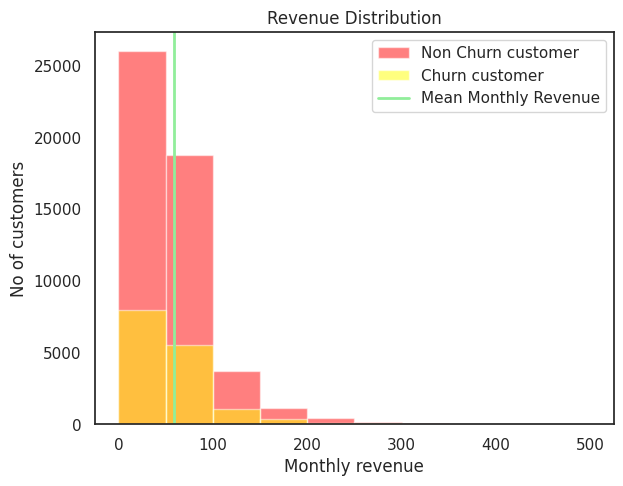

In [ ]:
churn_df = df[df['Churn'] == 1]
non_churn_df = df[df['Churn'] == 0]

non_churn_df['Monthly Revenue'].fillna(non_churn_df['Monthly Revenue'].mean(), inplace=True)
churn_df['Monthly Revenue'].fillna(churn_df['Monthly Revenue'].mean(), inplace=True)

plt.hist(non_churn_df['Monthly Revenue'], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500], alpha=0.5, color='red', label='Non Churn customer')
plt.hist(churn_df['Monthly Revenue'], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500], alpha=0.5, color='yellow', label='Churn customer')

mean_rev = df['Monthly Revenue'].mean()

plt.axvline(mean_rev, label='Mean Monthly Revenue', color='#91ee9a', linewidth=2)

plt.ylabel("No of customers")
plt.xlabel("Monthly revenue")
plt.legend()
plt.tight_layout()
plt.title('Revenue Distribution')
plt.show()


**Insights derived**

The graph shows the revenue distribution of customers by their mean monthly revenue.

The graph shows that the majority of customers have a mean monthly revenue of less than $100.

There is a peak in the number of customers at around 50 dollars in mean monthly revenue, which suggests that many customers have a relatively small amount of revenue. However, there is also a significant number of customers who have a mean monthly revenue of more than $100, which suggests that there is a core group of high-value customers.

The graph also shows that the number of customers decreases as the mean monthly revenue increases. This suggests that there are fewer high-value customers than there are low-value customers.

Overall, the graph shows that the majority of customers have a relatively small amount of revenue, but there is also a significant number of high-value customers. Businesses should focus on retaining both low-value and high-value customers, as they both contribute to the overall revenue of the business.

The mean monthly revenue for churn customers is lower than the mean monthly revenue for non-churn customers. This suggests that churn customers tend to have lower revenue.

The number of churn customers decreases as the mean monthly revenue increases. This suggests that high-value customers are less likely to churn.
Businesses should focus on retaining high-value customers, as they contribute a significant amount of revenue to the business.

**Visualising Customer Tenure: Churned Vs Non-Churned**

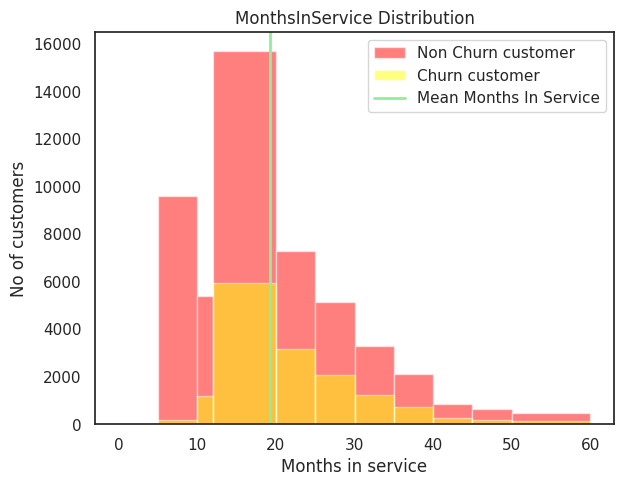

In [ ]:
non_churn_df['Months In Service'].fillna(non_churn_df['Months In Service'].mean(),inplace=True)
churn_df['Months In Service'].fillna(churn_df['Months In Service'].mean(),inplace=True)
plt.hist(non_churn_df['Months In Service'],bins=[0,5,10,12,20,25,30,35,40,45,50,60],color='red',alpha=0.5, label='Non Churn customer')
plt.hist(churn_df['Months In Service'],bins=[0,5,10,12,20,25,30,35,40,45,50,60],color='yellow',alpha=0.5,label='Churn customer')
mean_rev=df['Months In Service'].mean()
plt.axvline(mean_rev,label='Mean Months In Service',color='#91ee9a',linewidth=2)
plt.ylabel("No of customers")
plt.xlabel("Months in service")
plt.legend()
plt.tight_layout()
plt.title('MonthsInService Distribution')
plt.show()

**Insights derived**

The bar graph you sent shows the distribution of customers in service based on the number of months they have been in service.

The graph shows that the majority of customers have been in service for less than 20 months. There is a peak in the number of customers at around 10 months in service, which suggests that many customers churn after about a year. However, there is also a significant number of customers who have been in service for more than 20 months, which suggests that there is a core group of loyal customers.

The graph also shows that the churn rate is higher for customers who have been in service for a shorter period of time. The churn rate for customers who have been in service for less than 10 months is about 20%, while the churn rate for customers who have been in service for more than 20 months is about 10%. This suggests that it is important to focus on retaining customers in their first year of service.

Overall, the graph shows that the majority of customers are new customers, and that the churn rate is higher for new customers. This suggests that it is important to focus on retaining new customers and building long-term relationships with them.

The mean months in service for churn customers is lower than the mean months in service for non-churn customers. This suggests that churn customers tend to leave the company sooner.

The churn rate is highest in the first 10 months of service. This suggests that companies should focus on retaining customers during this period.

The churn rate decreases after the first 10 months of service. This suggests that companies are able to build loyalty with customers who stay with them for longer periods of time.

**Visualising the success rate of making retention calls to team**

In [ ]:
Retentionpurpose_df = df[df['MadeCallToRetentionTeam'] == 1]

In [ ]:
print("Total number of customers who made call to team for retention purpose {}".format(Retentionpurpose_df.shape[0]))

Total number of customers who made call to team for retention purpose 2187


In [ ]:
print("Number of customers churned after making call {}".format(Retentionpurpose_df[Retentionpurpose_df['Churn'] == 1].shape[0]))
print("Number of customers retained after making call {}".format(Retentionpurpose_df[Retentionpurpose_df['Churn'] == 0].shape[0]))

Number of customers churned after making call 899
Number of customers retained after making call 1288


In [ ]:
print ("Success rate of making retention calls to team  {}".format(Retentionpurpose_df[Retentionpurpose_df['Churn']==0].shape[0]/Retentionpurpose_df.shape[0]))

Success rate of making retention calls to team  0.5889346136259717


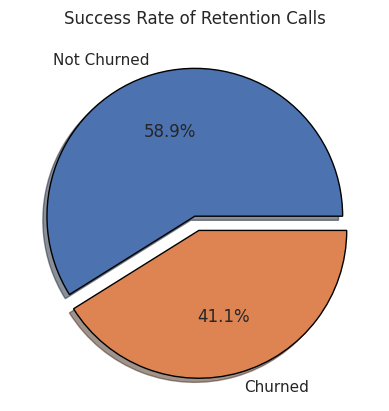

In [ ]:
slices = [Retentionpurpose_df[Retentionpurpose_df['Churn']==0].shape[0], Retentionpurpose_df[Retentionpurpose_df['Churn']==1].shape[0]]
labels = ['Not Churned', 'Churned']
explode = [0, 0.1]
plt.pie(slices, labels=labels, explode=explode, wedgeprops={'edgecolor':'black'}, shadow=True, autopct='%1.1f%%')
plt.title("Success Rate of Retention Calls")
plt.show()


**Visualising success rate of accepting retention offers**

In [ ]:
Retentionoffers_df = df[df['RetentionOffersAccepted'] == 1]

In [ ]:
print("Total number of customers who accepted retention offers {}".format(Retentionoffers_df.shape[0]))

Total number of customers who accepted retention offers 1056


In [ ]:
print("Number of customers churned after accpeting retention offers {}".format(Retentionoffers_df[Retentionoffers_df['Churn'] == 1].shape[0]))
print("Number of customers retained after accepting retention offers {}".format(Retentionoffers_df[Retentionoffers_df['Churn'] == 0].shape[0]))

Number of customers churned after accpeting retention offers 397
Number of customers retained after accepting retention offers 659


In [ ]:
print ("Success rate of accepting retention offers  {}".format(Retentionoffers_df[Retentionoffers_df['Churn']==0].shape[0]/Retentionoffers_df.shape[0]))

Success rate of accepting retention offers  0.6240530303030303


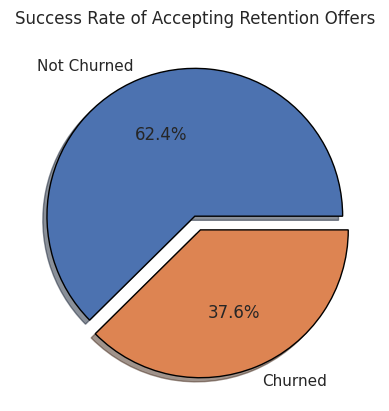

In [ ]:
slices = [Retentionoffers_df[Retentionoffers_df['Churn']==0].shape[0], Retentionoffers_df[Retentionoffers_df['Churn']==1].shape[0]]
labels = ['Not Churned', 'Churned']
explode = [0, 0.1]
plt.pie(slices, labels=labels, explode=explode, wedgeprops={'edgecolor':'black'}, shadow=True, autopct='%1.1f%%')
plt.title("Success Rate of Accepting Retention Offers")
plt.show()


# **Data Pre-Processing**

In [ ]:
#Creating Correlation Matrix
correlation_matrix = df.corr()

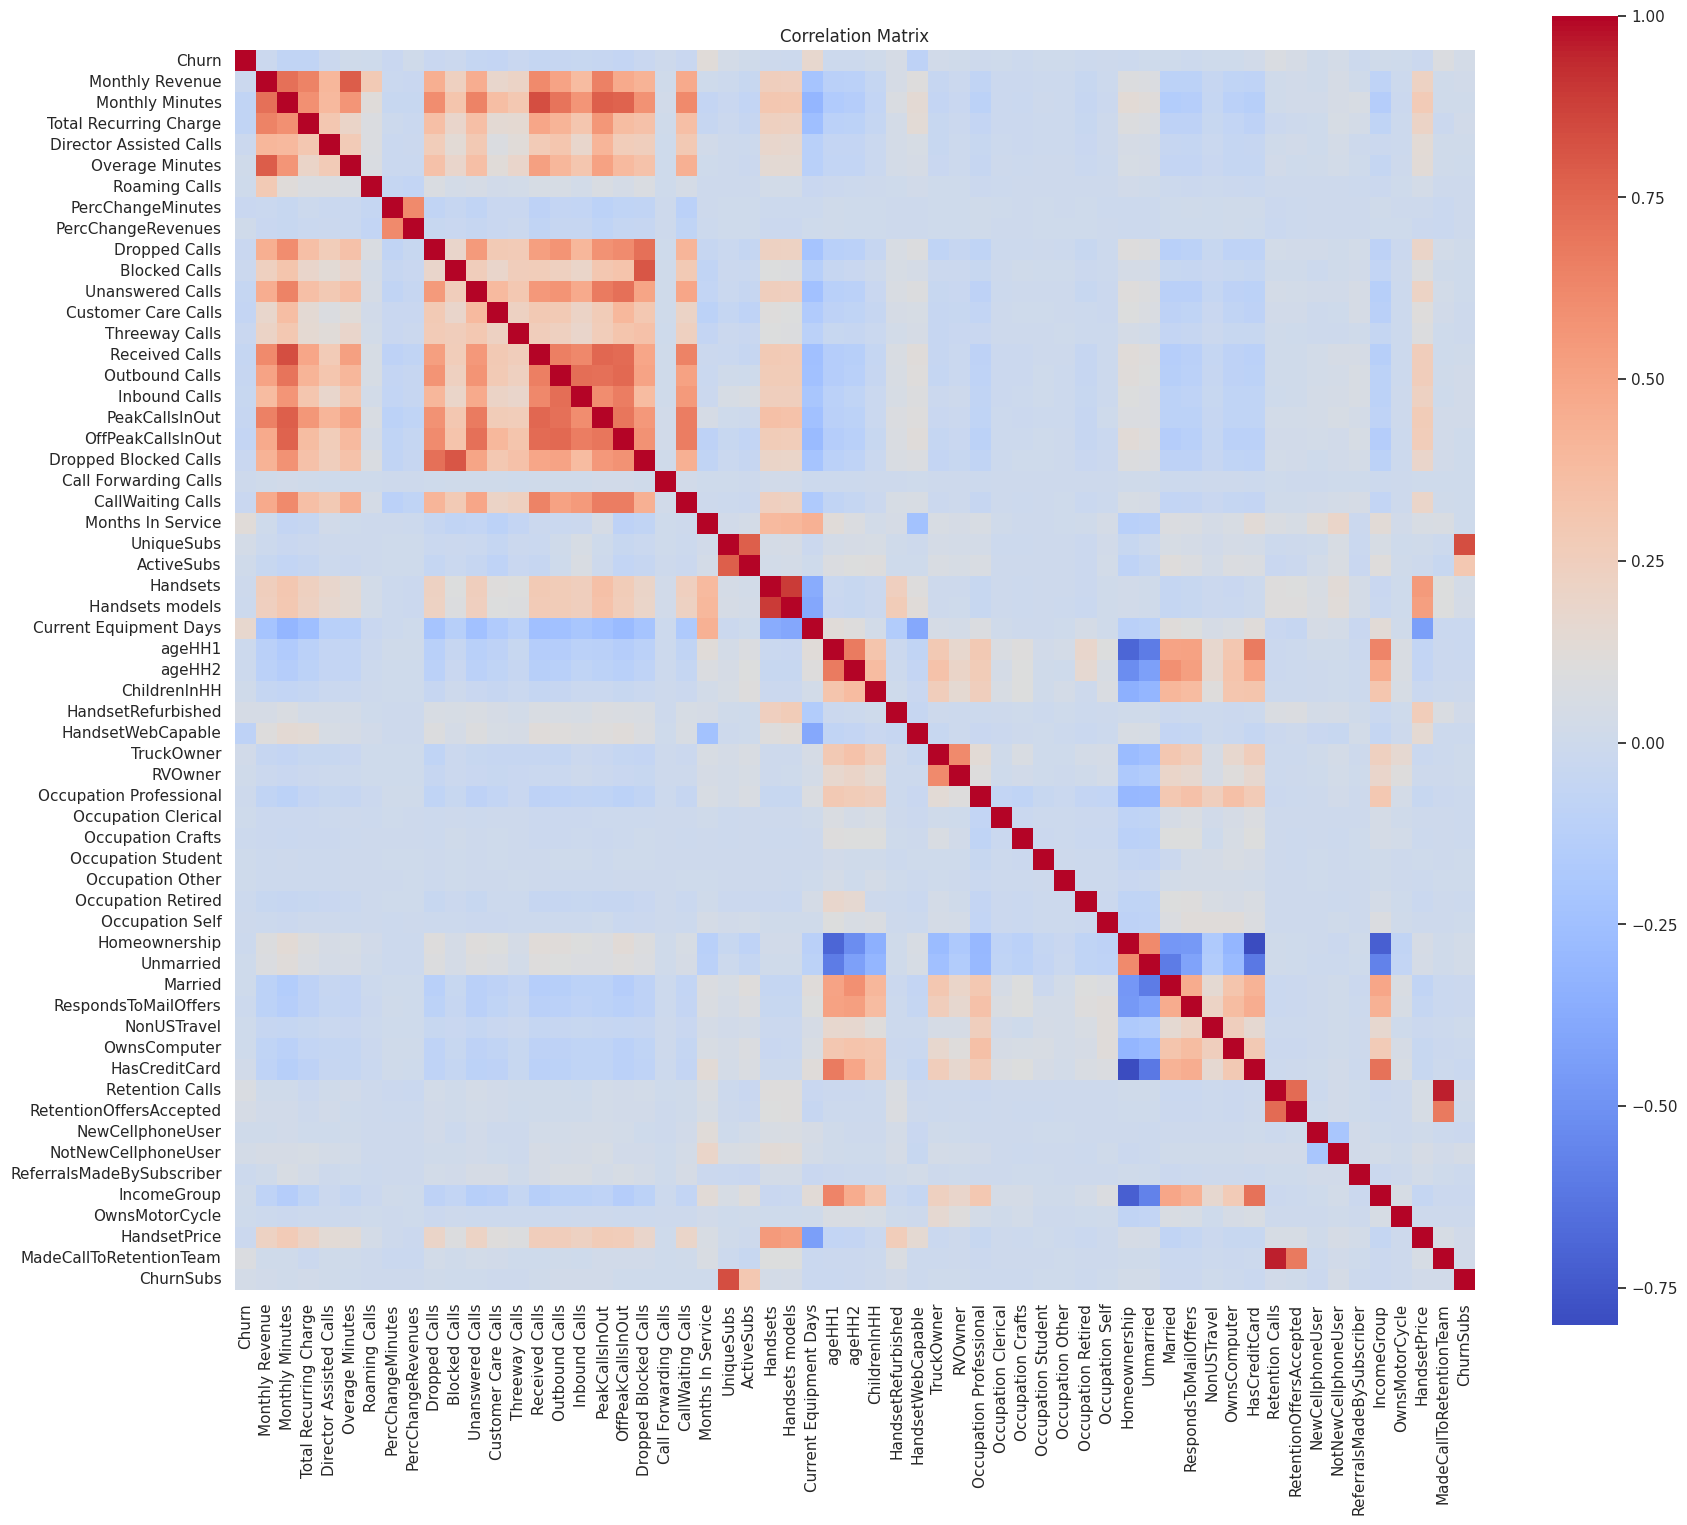

In [ ]:
# Creating a heatmap of the correlation matrix without values
plt.figure(figsize=(20, 17))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Finding highly correlated features
threshold = 0.8
highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

# Getting the indices of highly correlated features
indices = [(i, j) for i in range(correlation_matrix.shape[0]) for j in range(i+1, correlation_matrix.shape[1]) if highly_correlated.iloc[i, j]]

# Printing the highly correlated features
for i, j in indices:
    print(f"Features '{df.columns[i]}' and '{df.columns[j]}' are highly correlated with a correlation of {correlation_matrix.iloc[i, j]:.2f}")

Features 'Monthly Minutes' and 'Received Calls' are highly correlated with a correlation of 0.84
Features 'Blocked Calls' and 'Dropped Blocked Calls' are highly correlated with a correlation of 0.81
Features 'UniqueSubs' and 'ChurnSubs' are highly correlated with a correlation of 0.83
Features 'Handsets' and 'Handsets models' are highly correlated with a correlation of 0.89
Features 'Homeownership' and 'HasCreditCard' are highly correlated with a correlation of -0.80
Features 'Retention Calls' and 'MadeCallToRetentionTeam' are highly correlated with a correlation of 0.96


In [ ]:
# Dropping the highly correlated columns
Dataset = df.drop(['Received Calls', 'Blocked Calls', 'Retention Calls', 'UniqueSubs', 'Homeownership', 'Handsets'], axis=1)

In [ ]:
#checking whether the data set has null values or not
Null_values = Dataset.isnull().sum()
print(Null_values)

Churn                           0
Monthly Revenue               169
Monthly Minutes               169
Total Recurring Charge        169
Director Assisted Calls       169
Overage Minutes               169
Roaming Calls                 169
PercChangeMinutes             390
PercChangeRevenues            390
Dropped Calls                   0
Unanswered Calls                0
Customer Care Calls             0
Threeway Calls                  0
Outbound Calls                  0
Inbound Calls                   0
PeakCallsInOut                  0
OffPeakCallsInOut               0
Dropped Blocked Calls           0
Call Forwarding Calls           0
CallWaiting Calls               0
Months In Service               0
ActiveSubs                      0
Handsets models                 1
Current Equipment Days          1
ageHH1                       1102
ageHH2                       1102
ChildrenInHH                    0
HandsetRefurbished              0
HandsetWebCapable               0
TruckOwner    

In [ ]:
#Determining total null values in data set
Total_Null_values = Dataset.isnull().sum().sum()
print(Total_Null_values)

4000


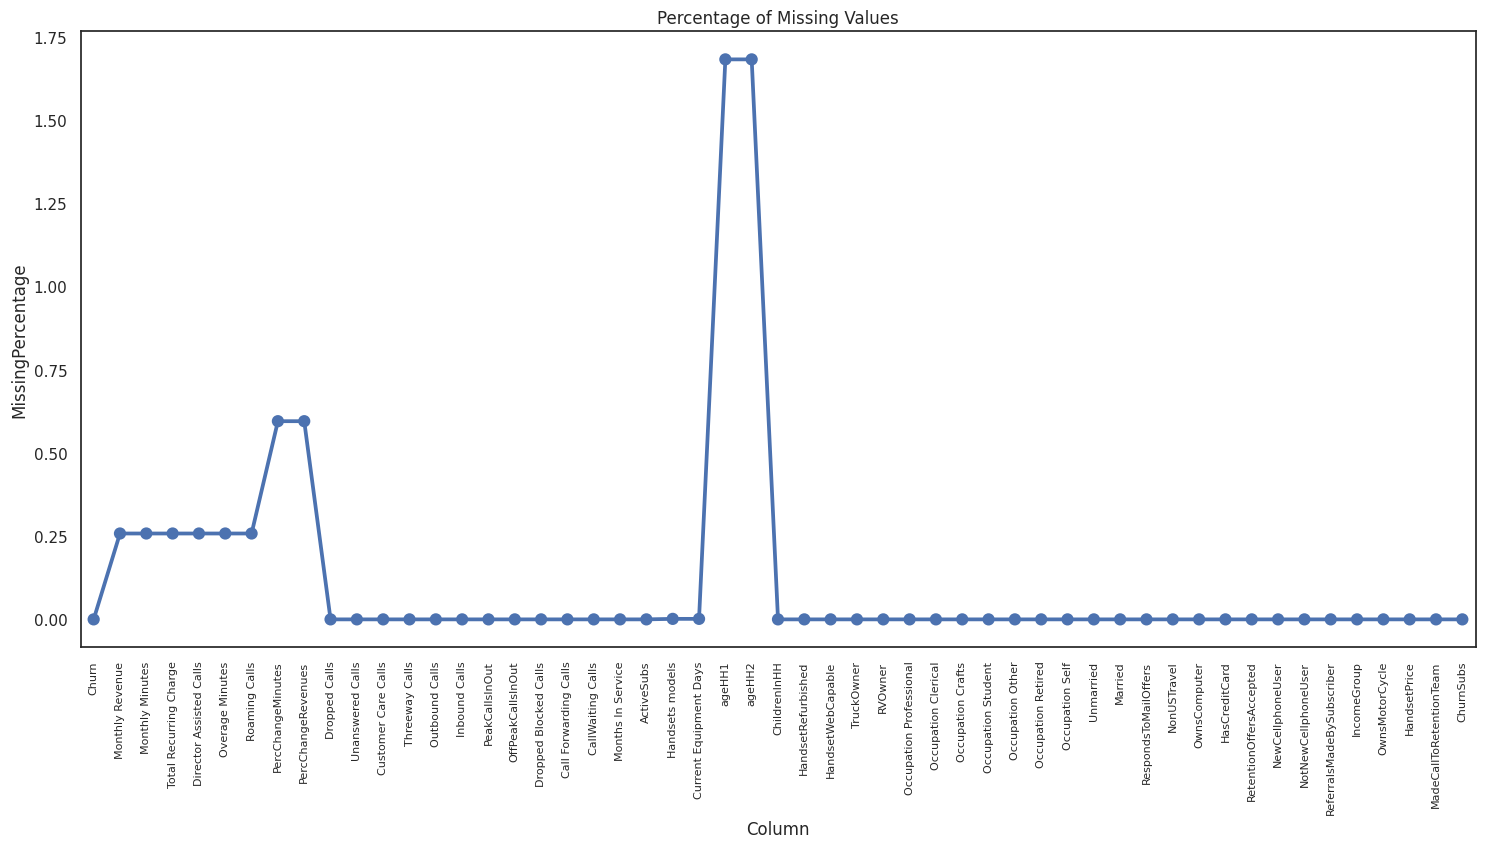

In [ ]:
#Plotting graph of percentage of missing values
Missing_values_percent = (Dataset.isnull().sum() * 100) / df.shape[0]
Missing_values_df = pd.DataFrame({'Column': Dataset.columns, 'MissingPercentage': Missing_values_percent}).reset_index(drop=True)
plt.figure(figsize=(18, 8))
ax = sns.pointplot(x='Column', y='MissingPercentage', data=Missing_values_df)
plt.xticks(rotation=90, fontsize=8)
plt.title("Percentage of Missing Values")
plt.show()

In [ ]:
# Dropping the columns with more than 30 to 40% of missing values
Data = Dataset.drop(['PercChangeMinutes', 'PercChangeRevenues', 'ageHH1', 'ageHH2'], axis=1)
print(Data.columns)

Index(['Churn', 'Monthly Revenue', 'Monthly Minutes', 'Total Recurring Charge',
       'Director Assisted Calls', 'Overage Minutes', 'Roaming Calls',
       'Dropped Calls', 'Unanswered Calls', 'Customer Care Calls',
       'Threeway Calls', 'Outbound Calls', 'Inbound Calls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'Dropped Blocked Calls', 'Call Forwarding Calls',
       'CallWaiting Calls', 'Months In Service', 'ActiveSubs',
       'Handsets models', 'Current Equipment Days', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Occupation Professional', 'Occupation Clerical', 'Occupation Crafts',
       'Occupation Student', 'Occupation Other', 'Occupation Retired',
       'Occupation Self', 'Unmarried', 'Married', 'RespondsToMailOffers',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorCycle

In [ ]:
#Checking for Duplicate Values in the dataset
len(Data[Data.duplicated()])

0

In [ ]:
#Handling the missing values
columns_to_impute = ['Monthly Revenue', 'Monthly Minutes', 'Total Recurring Charge', 'Director Assisted Calls', 'Overage Minutes', 'Roaming Calls', 'Current Equipment Days']

# Creating an instance of SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fitting and transforming the imputer to fill missing values in the specified columns
Data[columns_to_impute] = imputer.fit_transform(Data[columns_to_impute])

# Printing the filled DataFrame
print(Data)

       Churn  Monthly Revenue  Monthly Minutes  Total Recurring Charge  \
0          0        57.492500           482.75               37.424999   
1          0        82.275002          1312.25               75.000000   
2          0        31.662500            25.50               29.990000   
3          0        62.127499            97.50               65.985001   
4          0        25.225000             2.50               25.000000   
...      ...              ...              ...                     ...   
65528      1        38.990002           133.75               44.990002   
65529      1        64.695000           927.00               59.990002   
65530      1        38.990002           250.50               49.990002   
65531      1        57.439999           259.00               39.990002   
65532      1        48.912498           219.00               10.000000   

       Director Assisted Calls  Overage Minutes  Roaming Calls  Dropped Calls  \
0                       0.2475

In [ ]:
# Imputing  missing values with the mode
Data['Handsets models'].fillna(mode(Data['Handsets models']), inplace=True)

In [ ]:
#Checking Null values again
Data.isnull().sum()

Churn                        0
Monthly Revenue              0
Monthly Minutes              0
Total Recurring Charge       0
Director Assisted Calls      0
Overage Minutes              0
Roaming Calls                0
Dropped Calls                0
Unanswered Calls             0
Customer Care Calls          0
Threeway Calls               0
Outbound Calls               0
Inbound Calls                0
PeakCallsInOut               0
OffPeakCallsInOut            0
Dropped Blocked Calls        0
Call Forwarding Calls        0
CallWaiting Calls            0
Months In Service            0
ActiveSubs                   0
Handsets models              0
Current Equipment Days       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
Occupation Professional      0
Occupation Clerical          0
Occupation Crafts            0
Occupation Student           0
Occupation Other             0
Occupati

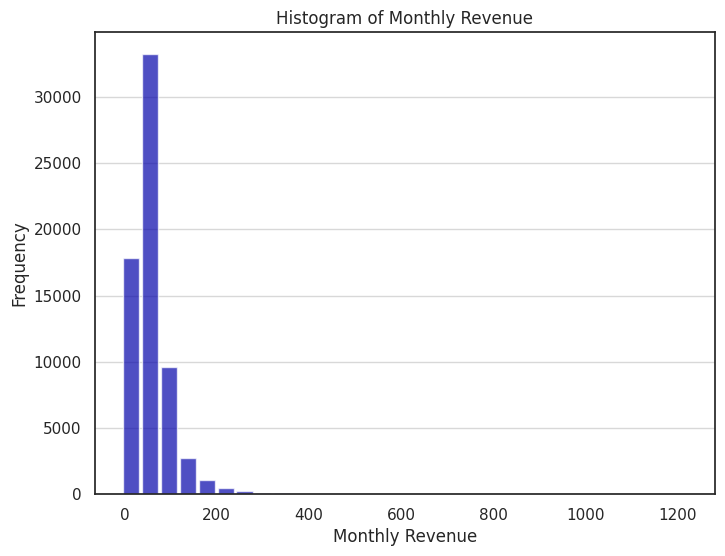

Monthly Revenue: Skewness = 3.9252848426657163, Kurtosis = 34.947350864271215


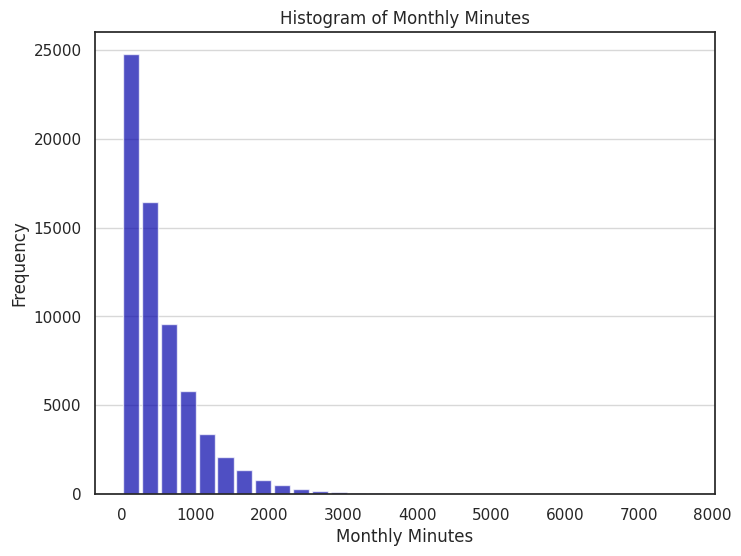

Monthly Minutes: Skewness = 2.210541077295733, Kurtosis = 8.227934325749388


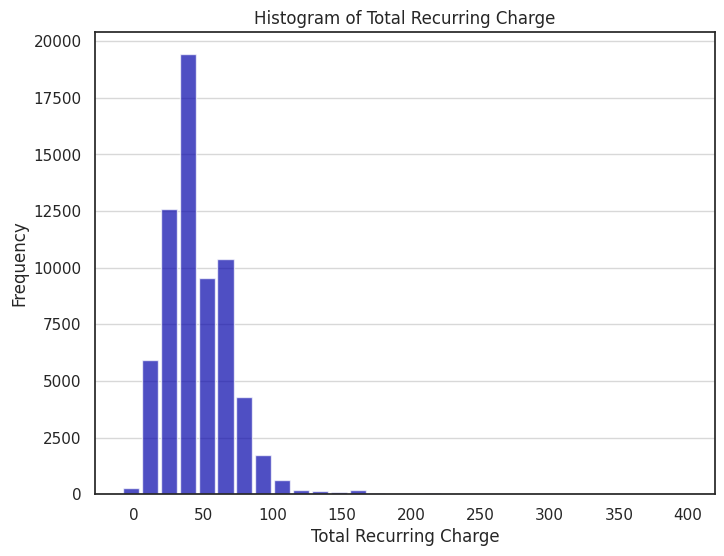

Total Recurring Charge: Skewness = 1.720393568119931, Kurtosis = 9.512693738213299


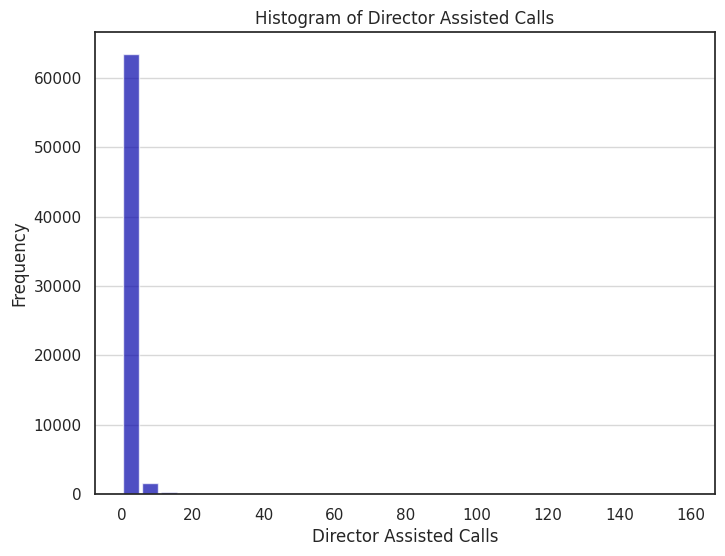

Director Assisted Calls: Skewness = 12.43828913828029, Kurtosis = 512.3631583072007


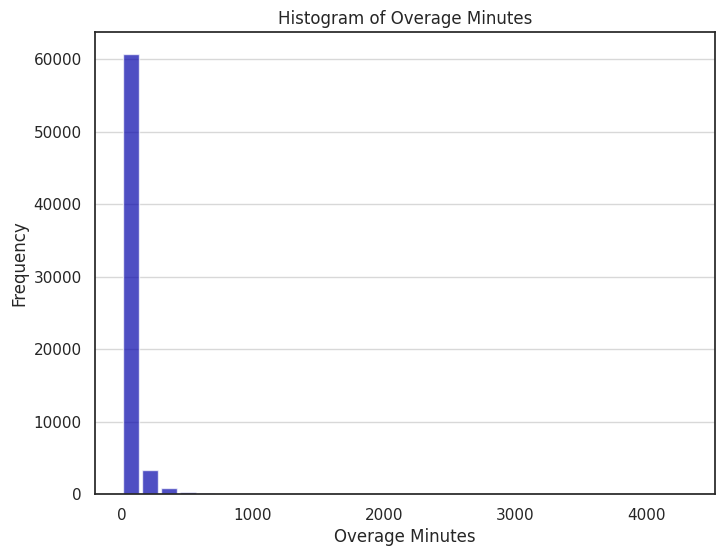

Overage Minutes: Skewness = 8.07951502132437, Kurtosis = 156.29841482262182


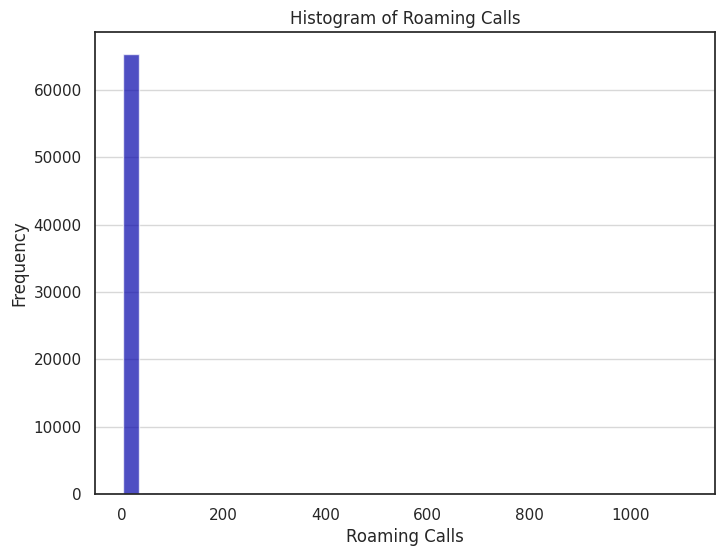

Roaming Calls: Skewness = 56.51826350441245, Kurtosis = 5620.205357473621


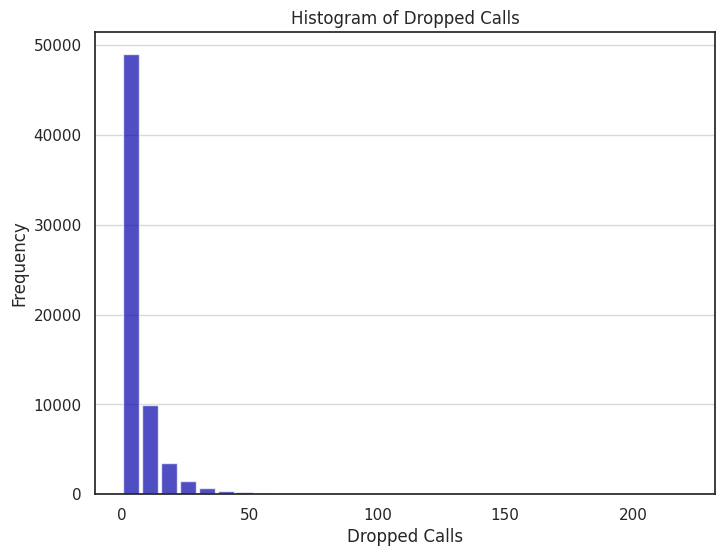

Dropped Calls: Skewness = 4.45736546824594, Kurtosis = 39.366592577351035


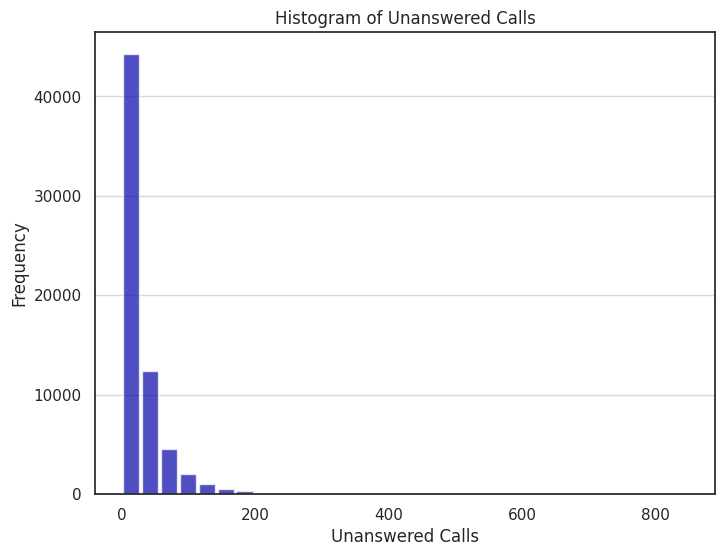

Unanswered Calls: Skewness = 4.370497359518781, Kurtosis = 39.95840977037876


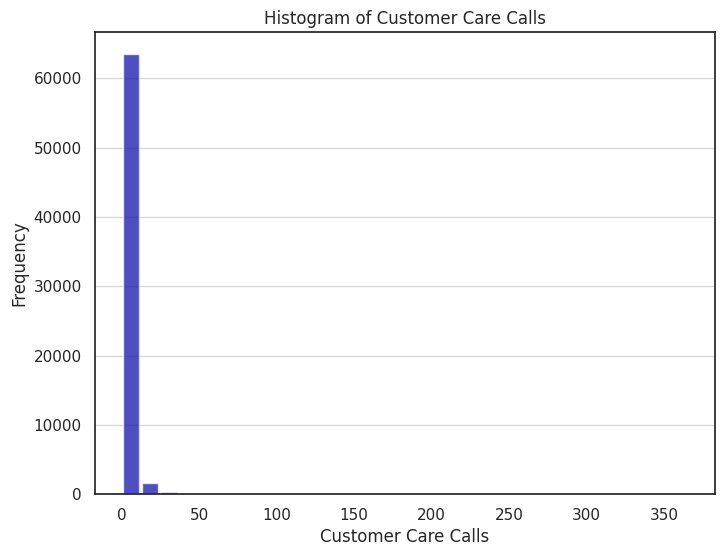

Customer Care Calls: Skewness = 17.87987086979953, Kurtosis = 862.4746332842923


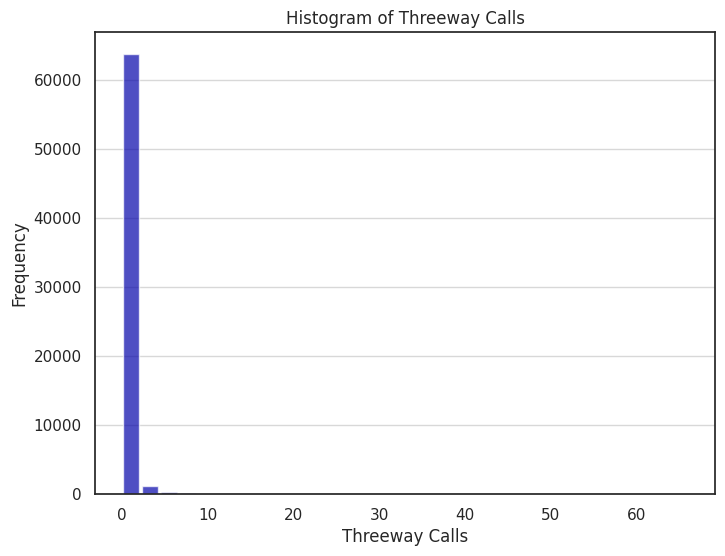

Threeway Calls: Skewness = 18.062561708341406, Kurtosis = 619.1057869721999


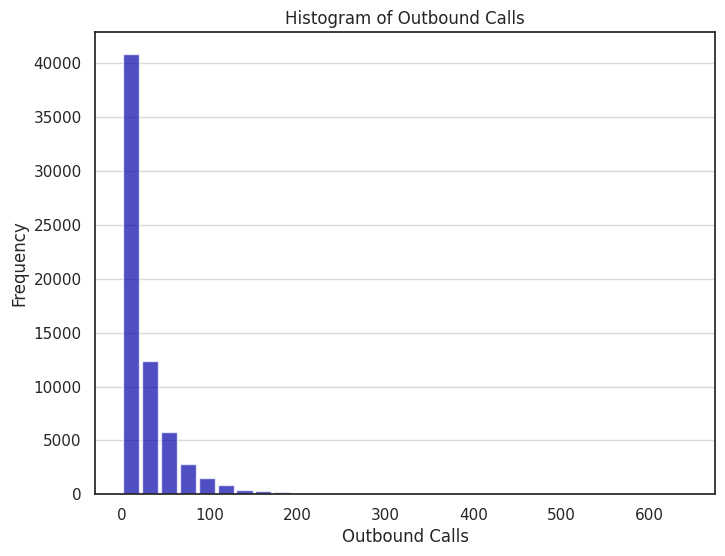

Outbound Calls: Skewness = 3.414398366720151, Kurtosis = 20.689605340027292


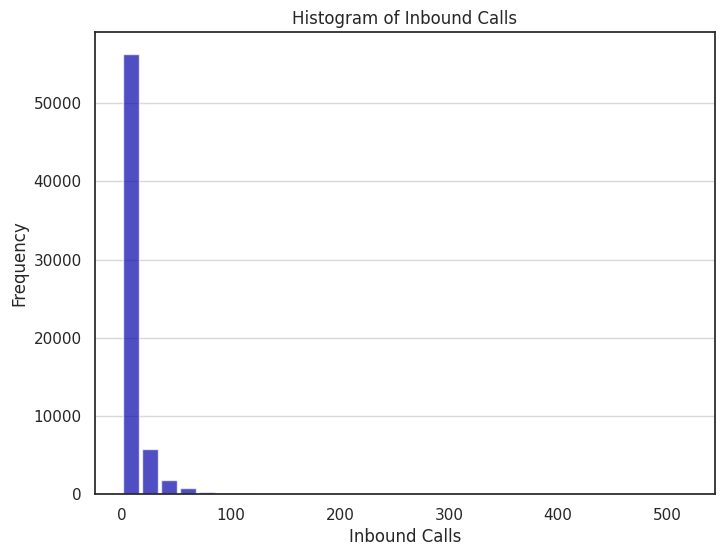

Inbound Calls: Skewness = 5.6668089829097985, Kurtosis = 62.8734297834977


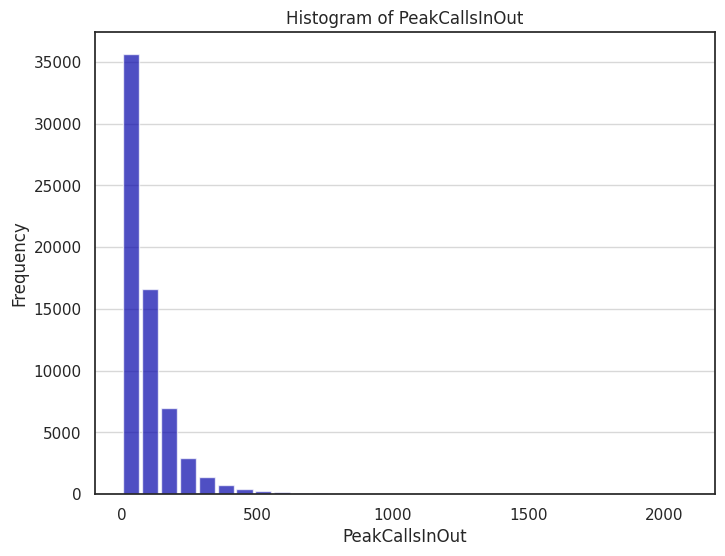

PeakCallsInOut: Skewness = 3.2606844752452484, Kurtosis = 20.64649610579832


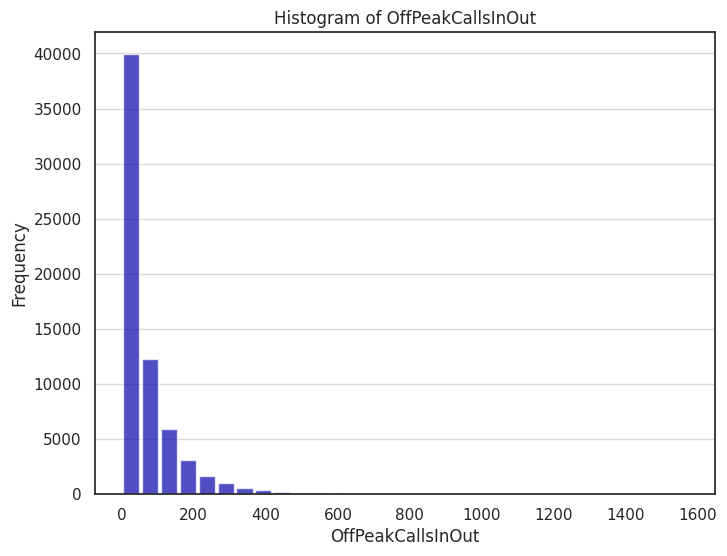

OffPeakCallsInOut: Skewness = 3.5995065399763475, Kurtosis = 23.631106082925395


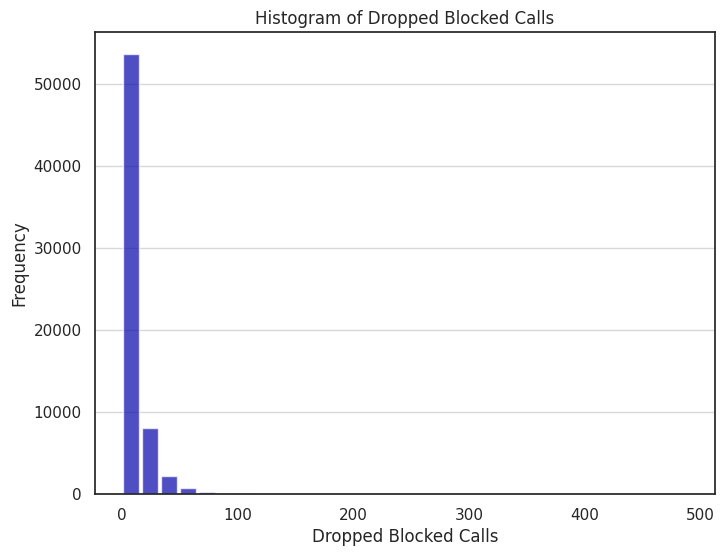

Dropped Blocked Calls: Skewness = 5.770094654103797, Kurtosis = 72.06590619076628


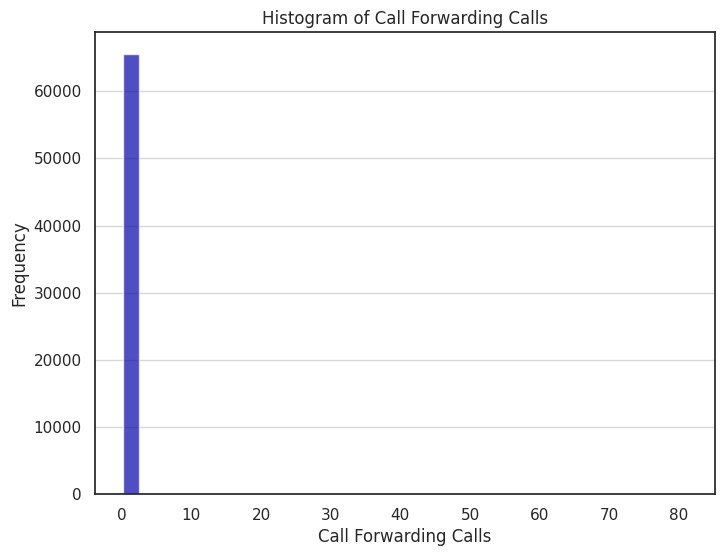

Call Forwarding Calls: Skewness = 91.47999622651628, Kurtosis = 9985.460144451072


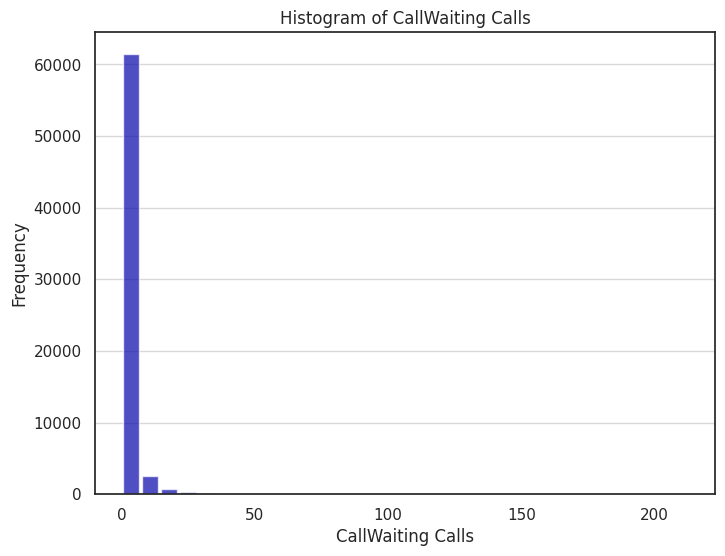

CallWaiting Calls: Skewness = 11.024572970575528, Kurtosis = 220.98423125035384


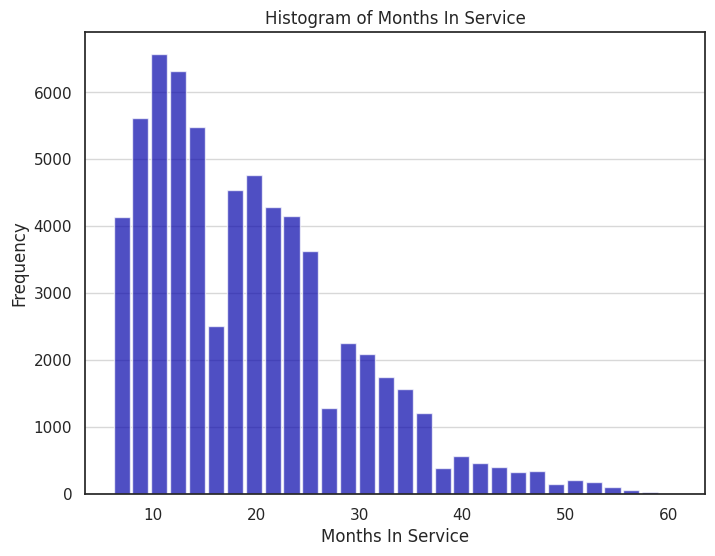

Months In Service: Skewness = 0.9941499786290051, Kurtosis = 0.8169892518408486


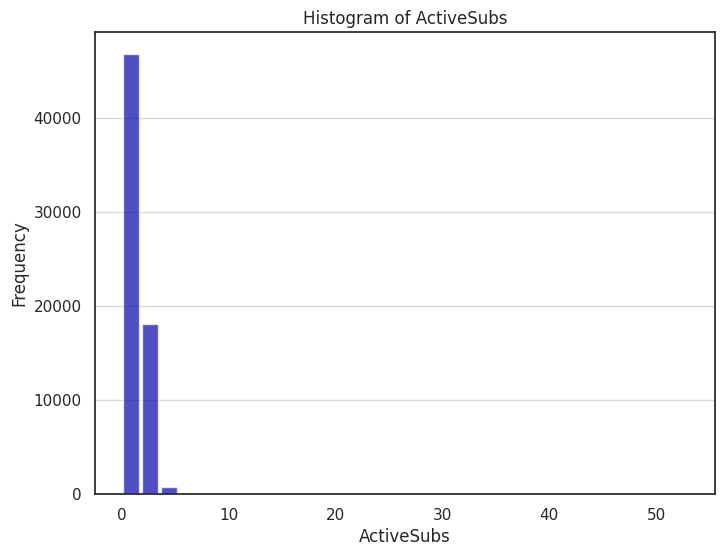

ActiveSubs: Skewness = 9.13058797042877, Kurtosis = 566.3375816302694


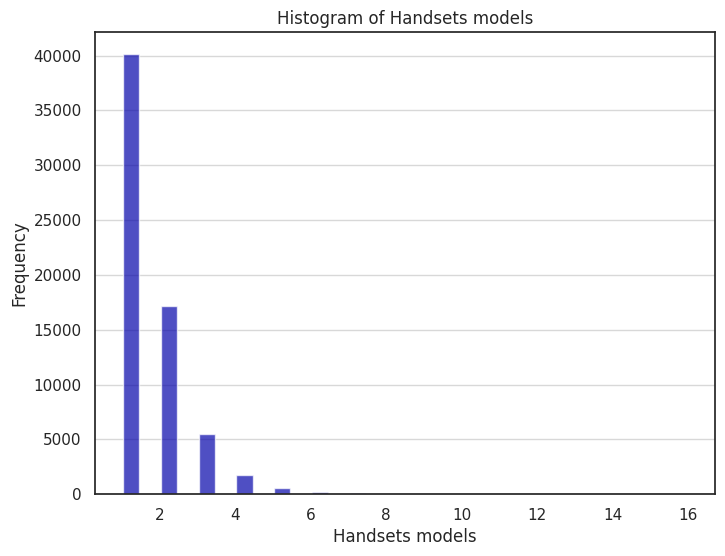

Handsets models: Skewness = 2.3637772968486495, Kurtosis = 9.544442322600313


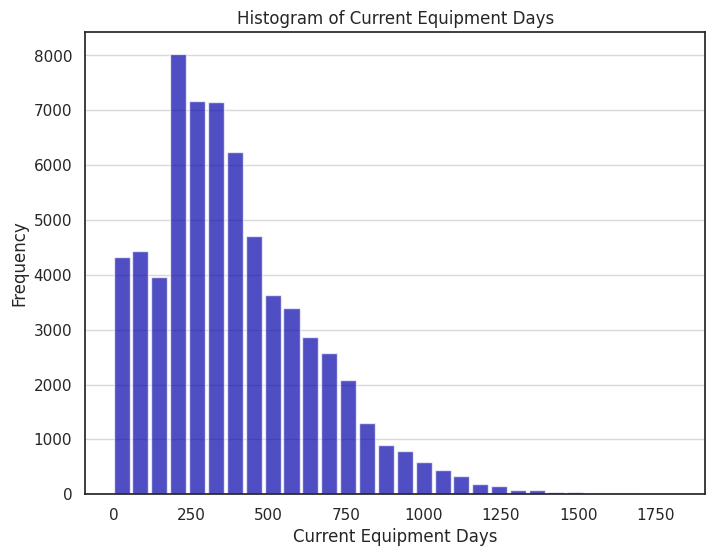

Current Equipment Days: Skewness = 1.0057578717351026, Kurtosis = 1.3449380868257848


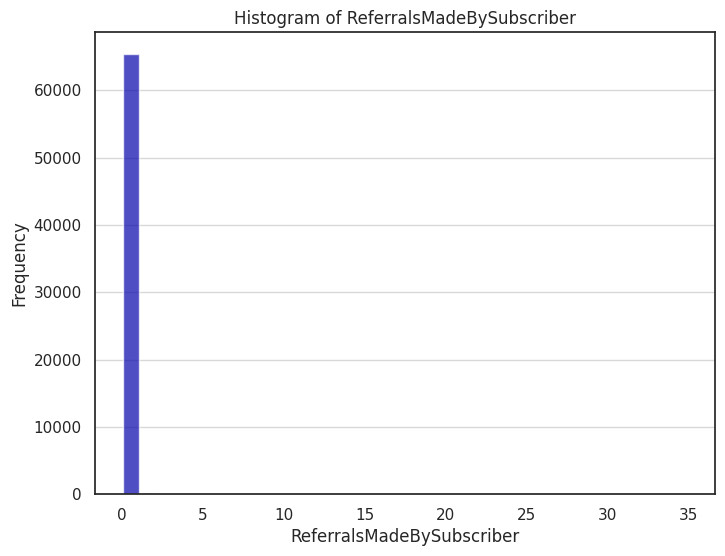

ReferralsMadeBySubscriber: Skewness = 33.525798919681655, Kurtosis = 3290.2077843435573


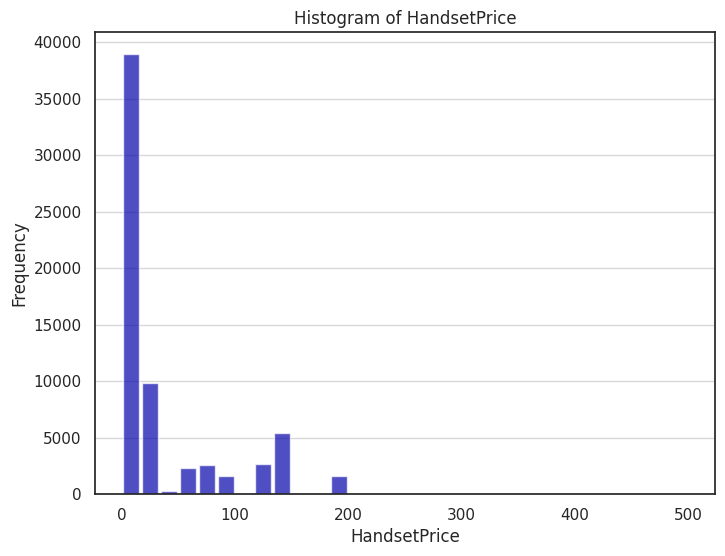

HandsetPrice: Skewness = 1.7230036872827539, Kurtosis = 2.9555345750021855


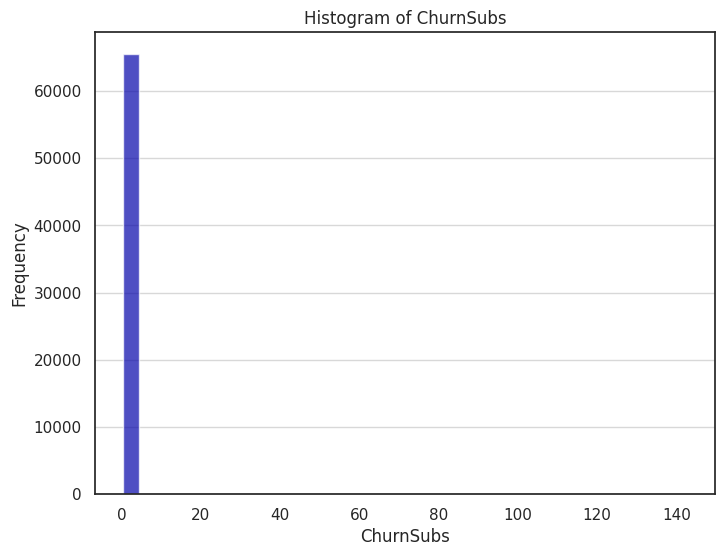

ChurnSubs: Skewness = 103.59504699013259, Kurtosis = 19283.110338814986


In [ ]:
#Plotting Histograms for Numerical Columns
numerical_columns = Data.select_dtypes(include=['int', 'float']).columns

# Setting a threshold for the number of unique values
unique_value_threshold = 10

# Excluding variables with unique values above the threshold
numerical_columns = [col for col in numerical_columns if Data[col].nunique() > unique_value_threshold]

# Plotting histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))

    # Adjusting the number of bins or set specific bin edges
    bins = 30

    plt.hist(Data[col], bins=bins, color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

    # Calculating skewness and kurtosis for each numerical column
    skewness = skew(Data[col])
    kurt = kurtosis(Data[col])
    print(f"{col}: Skewness = {skewness}, Kurtosis = {kurt}")


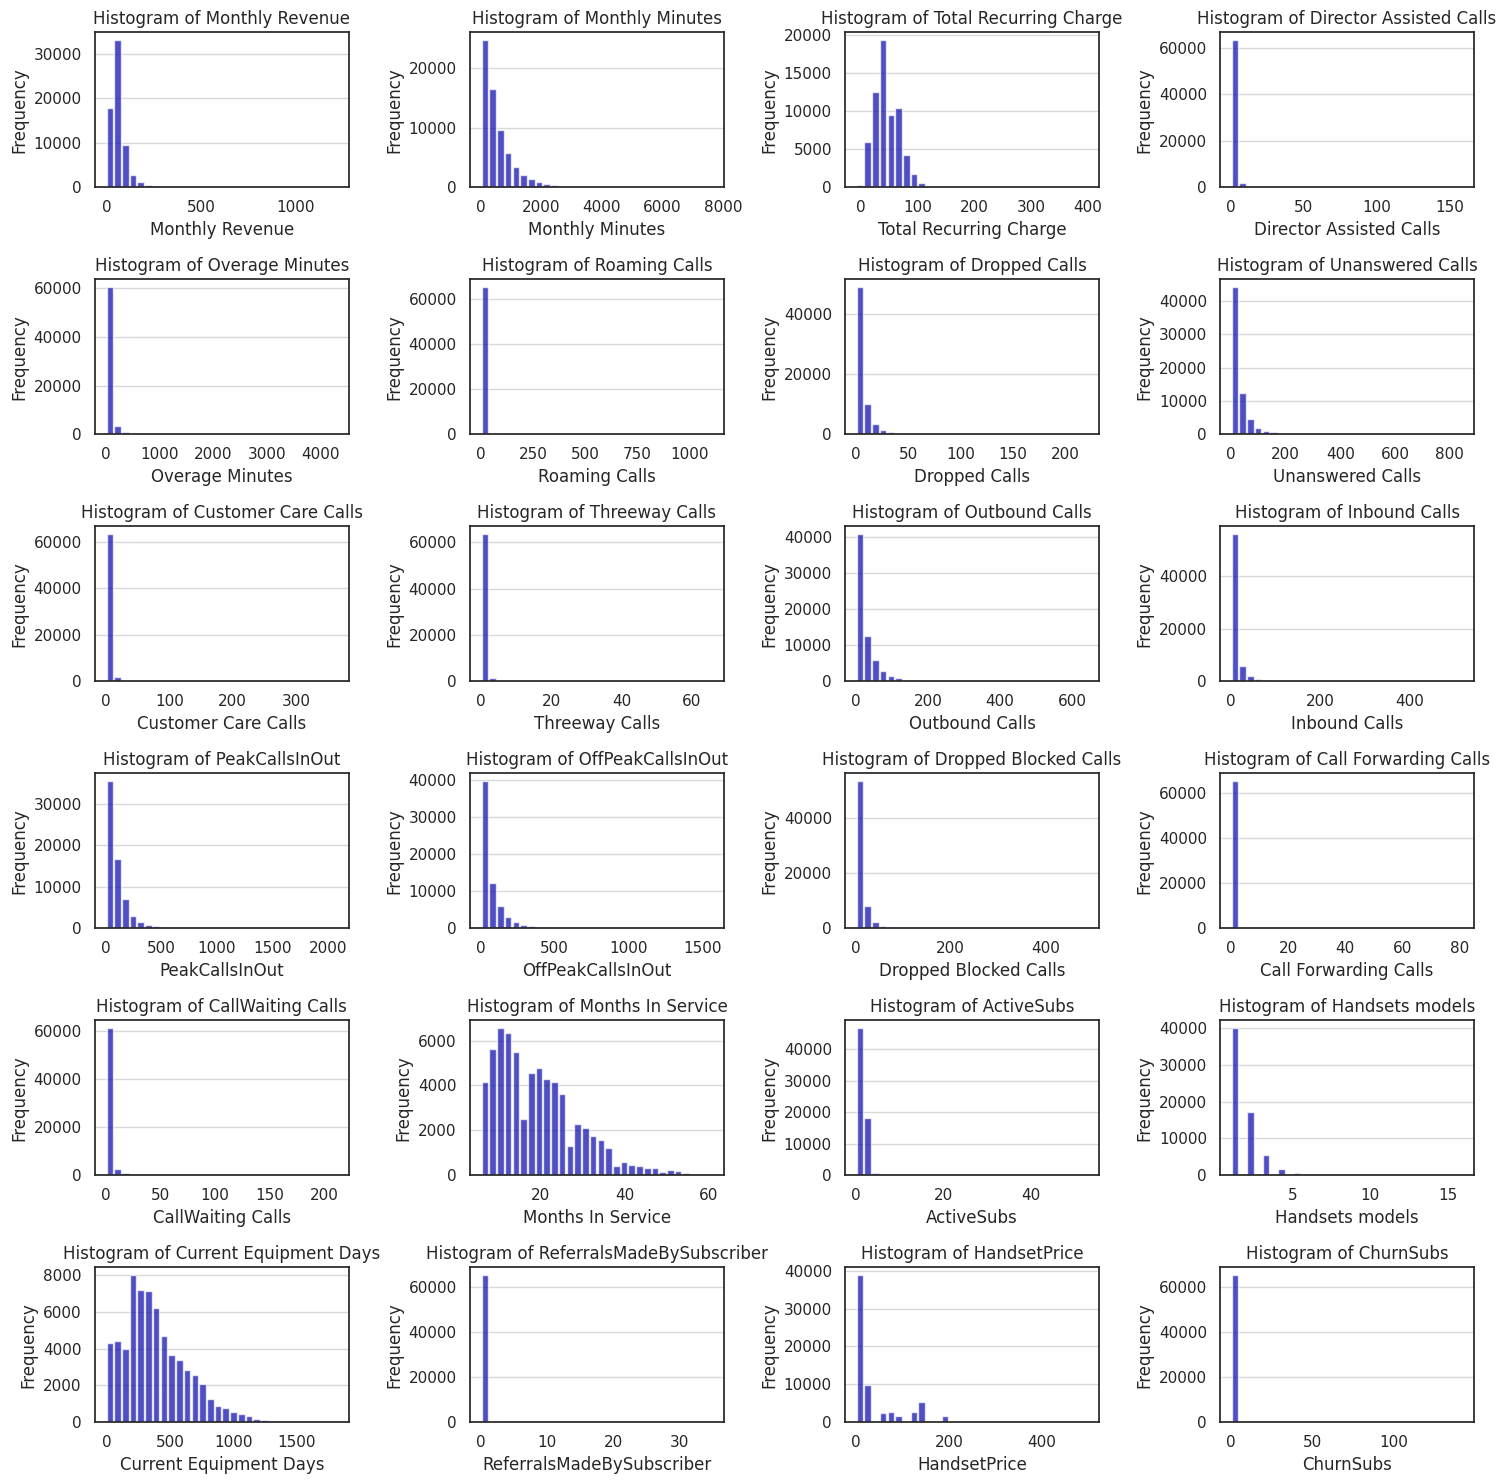

In [ ]:
#Plotting Histograms for Numerical Columns
numerical_columns = Data.select_dtypes(include=['int', 'float']).columns

# Setting a threshold for the number of unique values
unique_value_threshold = 10

# Excluding variables with unique values above the threshold
numerical_columns = [col for col in numerical_columns if Data[col].nunique() > unique_value_threshold]

# Calculating the number of rows and columns for subplots
num_cols = 4
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Plotting histograms for each numerical column
plt.figure(figsize=(15, 15))  # Adjust the figure size

for i, col in enumerate(numerical_columns):
    # Adjusting the number of bins or set specific bin edges
    bins = 30

    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(Data[col], bins=bins, color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


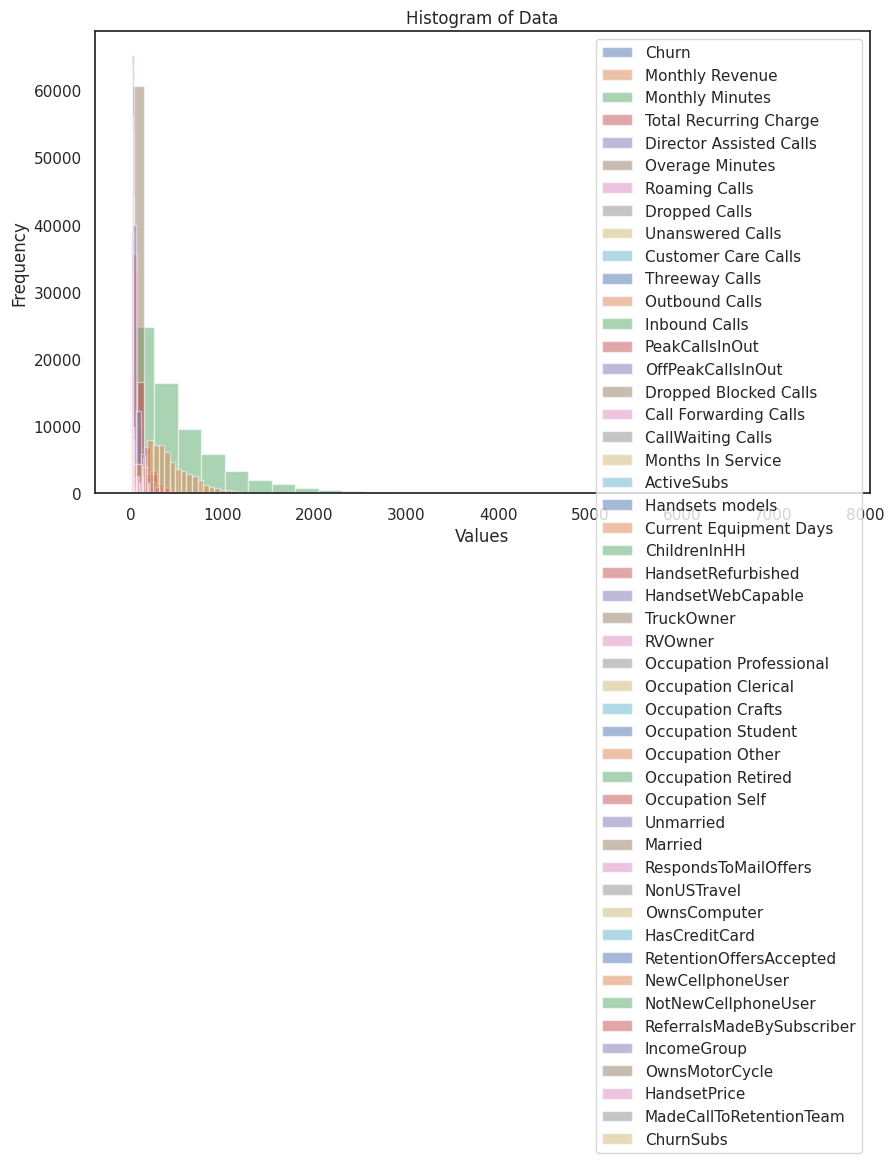

In [ ]:
n_bins = 30

plt.figure(figsize=(10, 6))

for column in Data.columns:
    plt.hist(Data[column], alpha=0.5, bins=n_bins, label=column)

plt.title('Histogram of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Identifying Outliers
def detect_outliers(data):
    if isinstance(data, pd.DataFrame):
        # Calculating column-wise mean and standard deviation if its a data frame
        mean = data.mean(axis=0)
        std_dev = data.std(axis=0)
    else:
        # Calculating mean and standard deviation if its a numpy array
        mean = np.mean(data)
        std_dev = np.std(data)

    # Setting a threshold
    threshold = 3

    # Finding the indices of outliers
    outliers = (np.abs((data - mean) / std_dev) > threshold)

    return outliers

outliers = detect_outliers(Data)

In [ ]:
#Printing Outliers
print(outliers)

       Churn  Monthly Revenue  Monthly Minutes  Total Recurring Charge  \
0      False            False            False                   False   
1      False            False            False                   False   
2      False            False            False                   False   
3      False            False            False                   False   
4      False            False            False                   False   
...      ...              ...              ...                     ...   
65528  False            False            False                   False   
65529  False            False            False                   False   
65530  False            False            False                   False   
65531  False            False            False                   False   
65532  False            False            False                   False   

       Director Assisted Calls  Overage Minutes  Roaming Calls  Dropped Calls  \
0                        False

In [ ]:
# Getting column names with outliers
columns_with_outliers = np.any(outliers, axis=0)

column_names = ["Churn", "Monthly Revenue", "Monthly Minutes", "Total Recurring Charge", "Director Assisted Calls", "Overage Minutes", "Roaming Calls", "Dropped Calls", "Unanswered Calls", "Customer Care Calls", "Threeway Calls", "Outbound Calls", "Inbound Calls", "PeakCallsInOut", "OffPeakCallsInOut", "Dropped Blocked Calls", "Call Forwarding Calls", "CallWaiting Calls", "Months In Service", "ActiveSubs", "Handsets", "Handsets models", "Current Equipment Days", "ChildrenInHH","HandsetRefurbished", "HandsetWebCapable", "TruckOwner", "RVOwner", "Occupation Professional", "Occupation Clerical", "Occupation Crafts", "Occupation Student", "Occupation Other", "Occupation Retired", "Occupation Self", "Homeownership", "Unmarried", "Married", "RespondsToMailOffers", "NonUSTravel",
"OwnsComputer", "HasCreditCard", "RetentionOffersAccepted", "NewCellphoneUser", "NotNewCellphoneUser", "ReferralsMadeBySubscriber",
"IncomeGroup", "OwnsMotorCycle", "HandsetPrice", "MadeCallToRetentionTeam"]

columns_with_outliers_indices = np.where(columns_with_outliers)

print("Columns with Outliers:")
for idx in columns_with_outliers_indices[0]:
    print(column_names[idx])


Columns with Outliers:
Monthly Revenue
Monthly Minutes
Total Recurring Charge
Director Assisted Calls
Overage Minutes
Roaming Calls
Dropped Calls
Unanswered Calls
Customer Care Calls
Threeway Calls
Outbound Calls
Inbound Calls
PeakCallsInOut
OffPeakCallsInOut
Dropped Blocked Calls
Call Forwarding Calls
CallWaiting Calls
Months In Service
ActiveSubs
Handsets
Handsets models
TruckOwner
Occupation Professional
Occupation Clerical
Occupation Crafts
Occupation Student
Occupation Other
Occupation Retired
Married
OwnsComputer
NewCellphoneUser
ReferralsMadeBySubscriber
IncomeGroup
OwnsMotorCycle
HandsetPrice


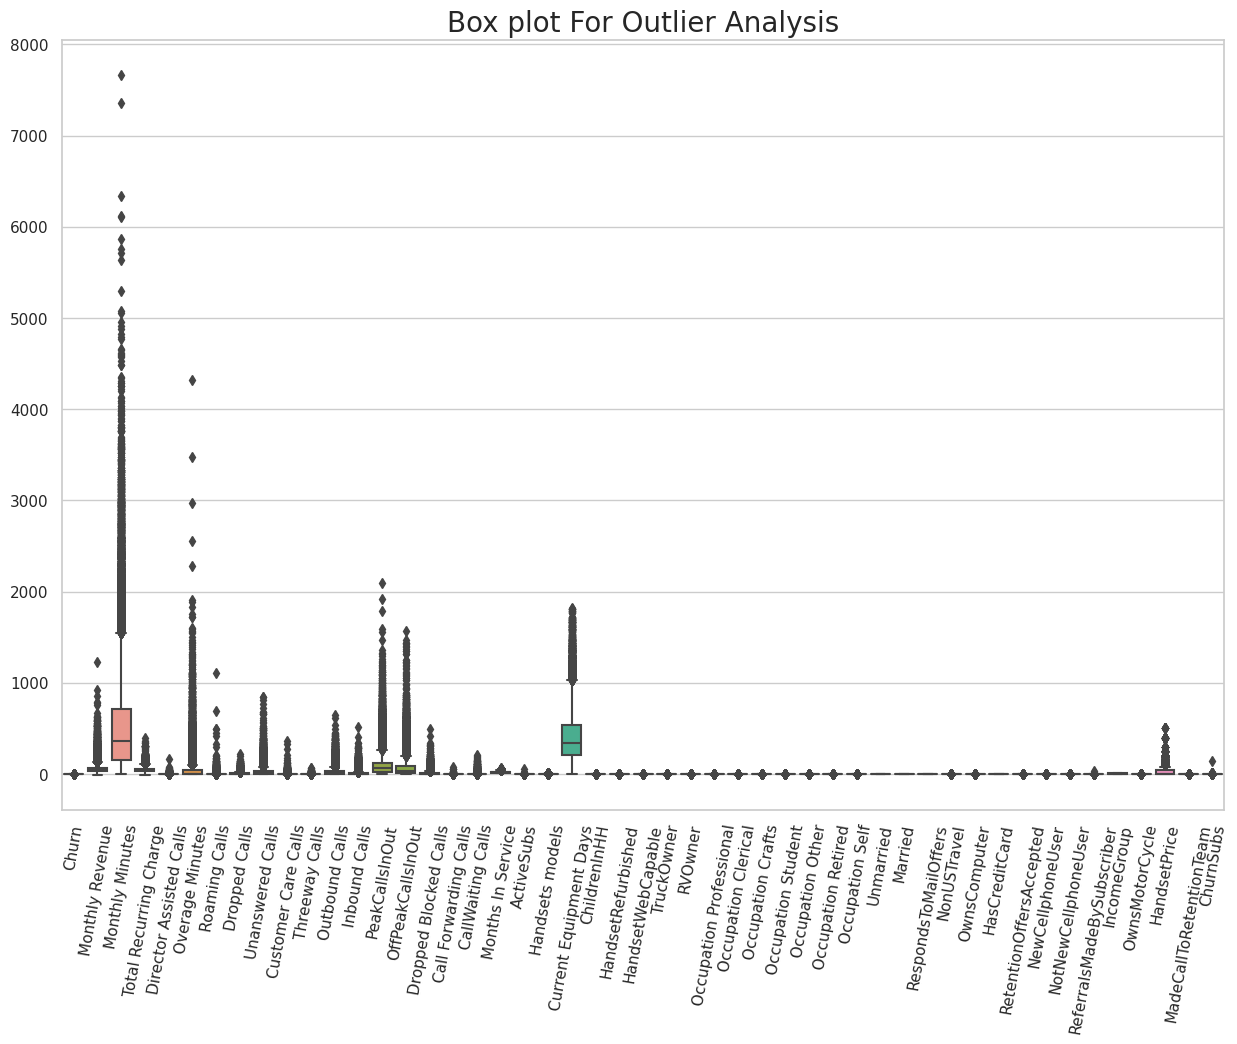

In [ ]:
#Creating Boxplot for Outliers
def boxplot(Data):

    sns.set(style="whitegrid",font_scale=1)
    plt.figure(figsize=(15,10))
    sns.boxplot(data=Data)
    plt.xticks(rotation=80)
    plt.title("Box plot For Outlier Analysis",fontsize = 20)
    plt.show()
boxplot(Data)

In [ ]:
#Determining Columns with Potential Outliers

# Specifying the columns that needs to be checked for outliers
columns_to_check = ['Monthly Revenue', 'Monthly Minutes', 'Total Recurring Charge', 'Director Assisted Calls', 'Overage Minutes', 'Roaming Calls', 'Dropped Calls',
'Unanswered Calls', 'Customer Care Calls', 'Threeway Calls', 'Outbound Calls', 'Inbound Calls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'Dropped Blocked Calls', 'Call Forwarding Calls',
'CallWaiting Calls', 'Months In Service', 'ChildrenInHH', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Occupation Professional', 'Occupation Clerical', 'Occupation Crafts', 'Occupation Self',
'Married', 'OwnsComputer', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser']

# Calculating z-scores for each column
z_scores = np.abs(zscore(Data[columns_to_check]))

# Defining a threshold for considering a value as an outlier
threshold = 3

# Identifying columns with outliers
columns_with_outliers = np.any(z_scores > threshold, axis=0)

# Displaying columns with outliers
print("Columns with Potential outliers:")
print(np.array(columns_to_check)[columns_with_outliers])


Columns with Potential outliers:
['Monthly Revenue' 'Monthly Minutes' 'Total Recurring Charge'
 'Director Assisted Calls' 'Overage Minutes' 'Roaming Calls'
 'Dropped Calls' 'Unanswered Calls' 'Customer Care Calls' 'Threeway Calls'
 'Outbound Calls' 'Inbound Calls' 'PeakCallsInOut' 'OffPeakCallsInOut'
 'Dropped Blocked Calls' 'Call Forwarding Calls' 'CallWaiting Calls'
 'Months In Service' 'RVOwner' 'Occupation Clerical' 'Occupation Crafts'
 'Occupation Self' 'RetentionOffersAccepted']


In [ ]:
# Dropping the columns which has potential outliers
Set = Data.drop(['Monthly Revenue',
 'Director Assisted Calls', 'Overage Minutes', 'Roaming Calls',
 'Dropped Calls', 'Unanswered Calls', 'Customer Care Calls', 'Threeway Calls',
 'Outbound Calls', 'Inbound Calls', 'PeakCallsInOut', 'OffPeakCallsInOut',
 'Dropped Blocked Calls', 'Call Forwarding Calls', 'CallWaiting Calls', 'RVOwner', 'Occupation Clerical', 'Occupation Crafts',
 'Occupation Self', 'RetentionOffersAccepted'], axis=1)
print(Set.columns)

Index(['Churn', 'Monthly Minutes', 'Total Recurring Charge',
       'Months In Service', 'ActiveSubs', 'Handsets models',
       'Current Equipment Days', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'Occupation Professional',
       'Occupation Student', 'Occupation Other', 'Occupation Retired',
       'Unmarried', 'Married', 'RespondsToMailOffers', 'NonUSTravel',
       'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorCycle', 'HandsetPrice', 'MadeCallToRetentionTeam',
       'ChurnSubs'],
      dtype='object')


In [ ]:
#Separating x (all feature columns except target column) and y (the target column - "Churn").

x = Set.drop('Churn', axis=1)
y = Set['Churn']

#Printing x and y
print(x.shape)
print(y.shape)

(65533, 28)
(65533,)


In [ ]:
# Spliting the data into 70% training and validation combined, and 30% testing
x_train_val, x_test, b_train_val, b_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Spliting the training and validation data into 50% each for training and validation
x_train, x_val, b_train, b_val = train_test_split(x_train_val, b_train_val, test_size=0.5, random_state=42)

# Printing the sizes of each set
print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Testing set size:", len(x_test))

Training set size: 22936
Validation set size: 22937
Testing set size: 19660


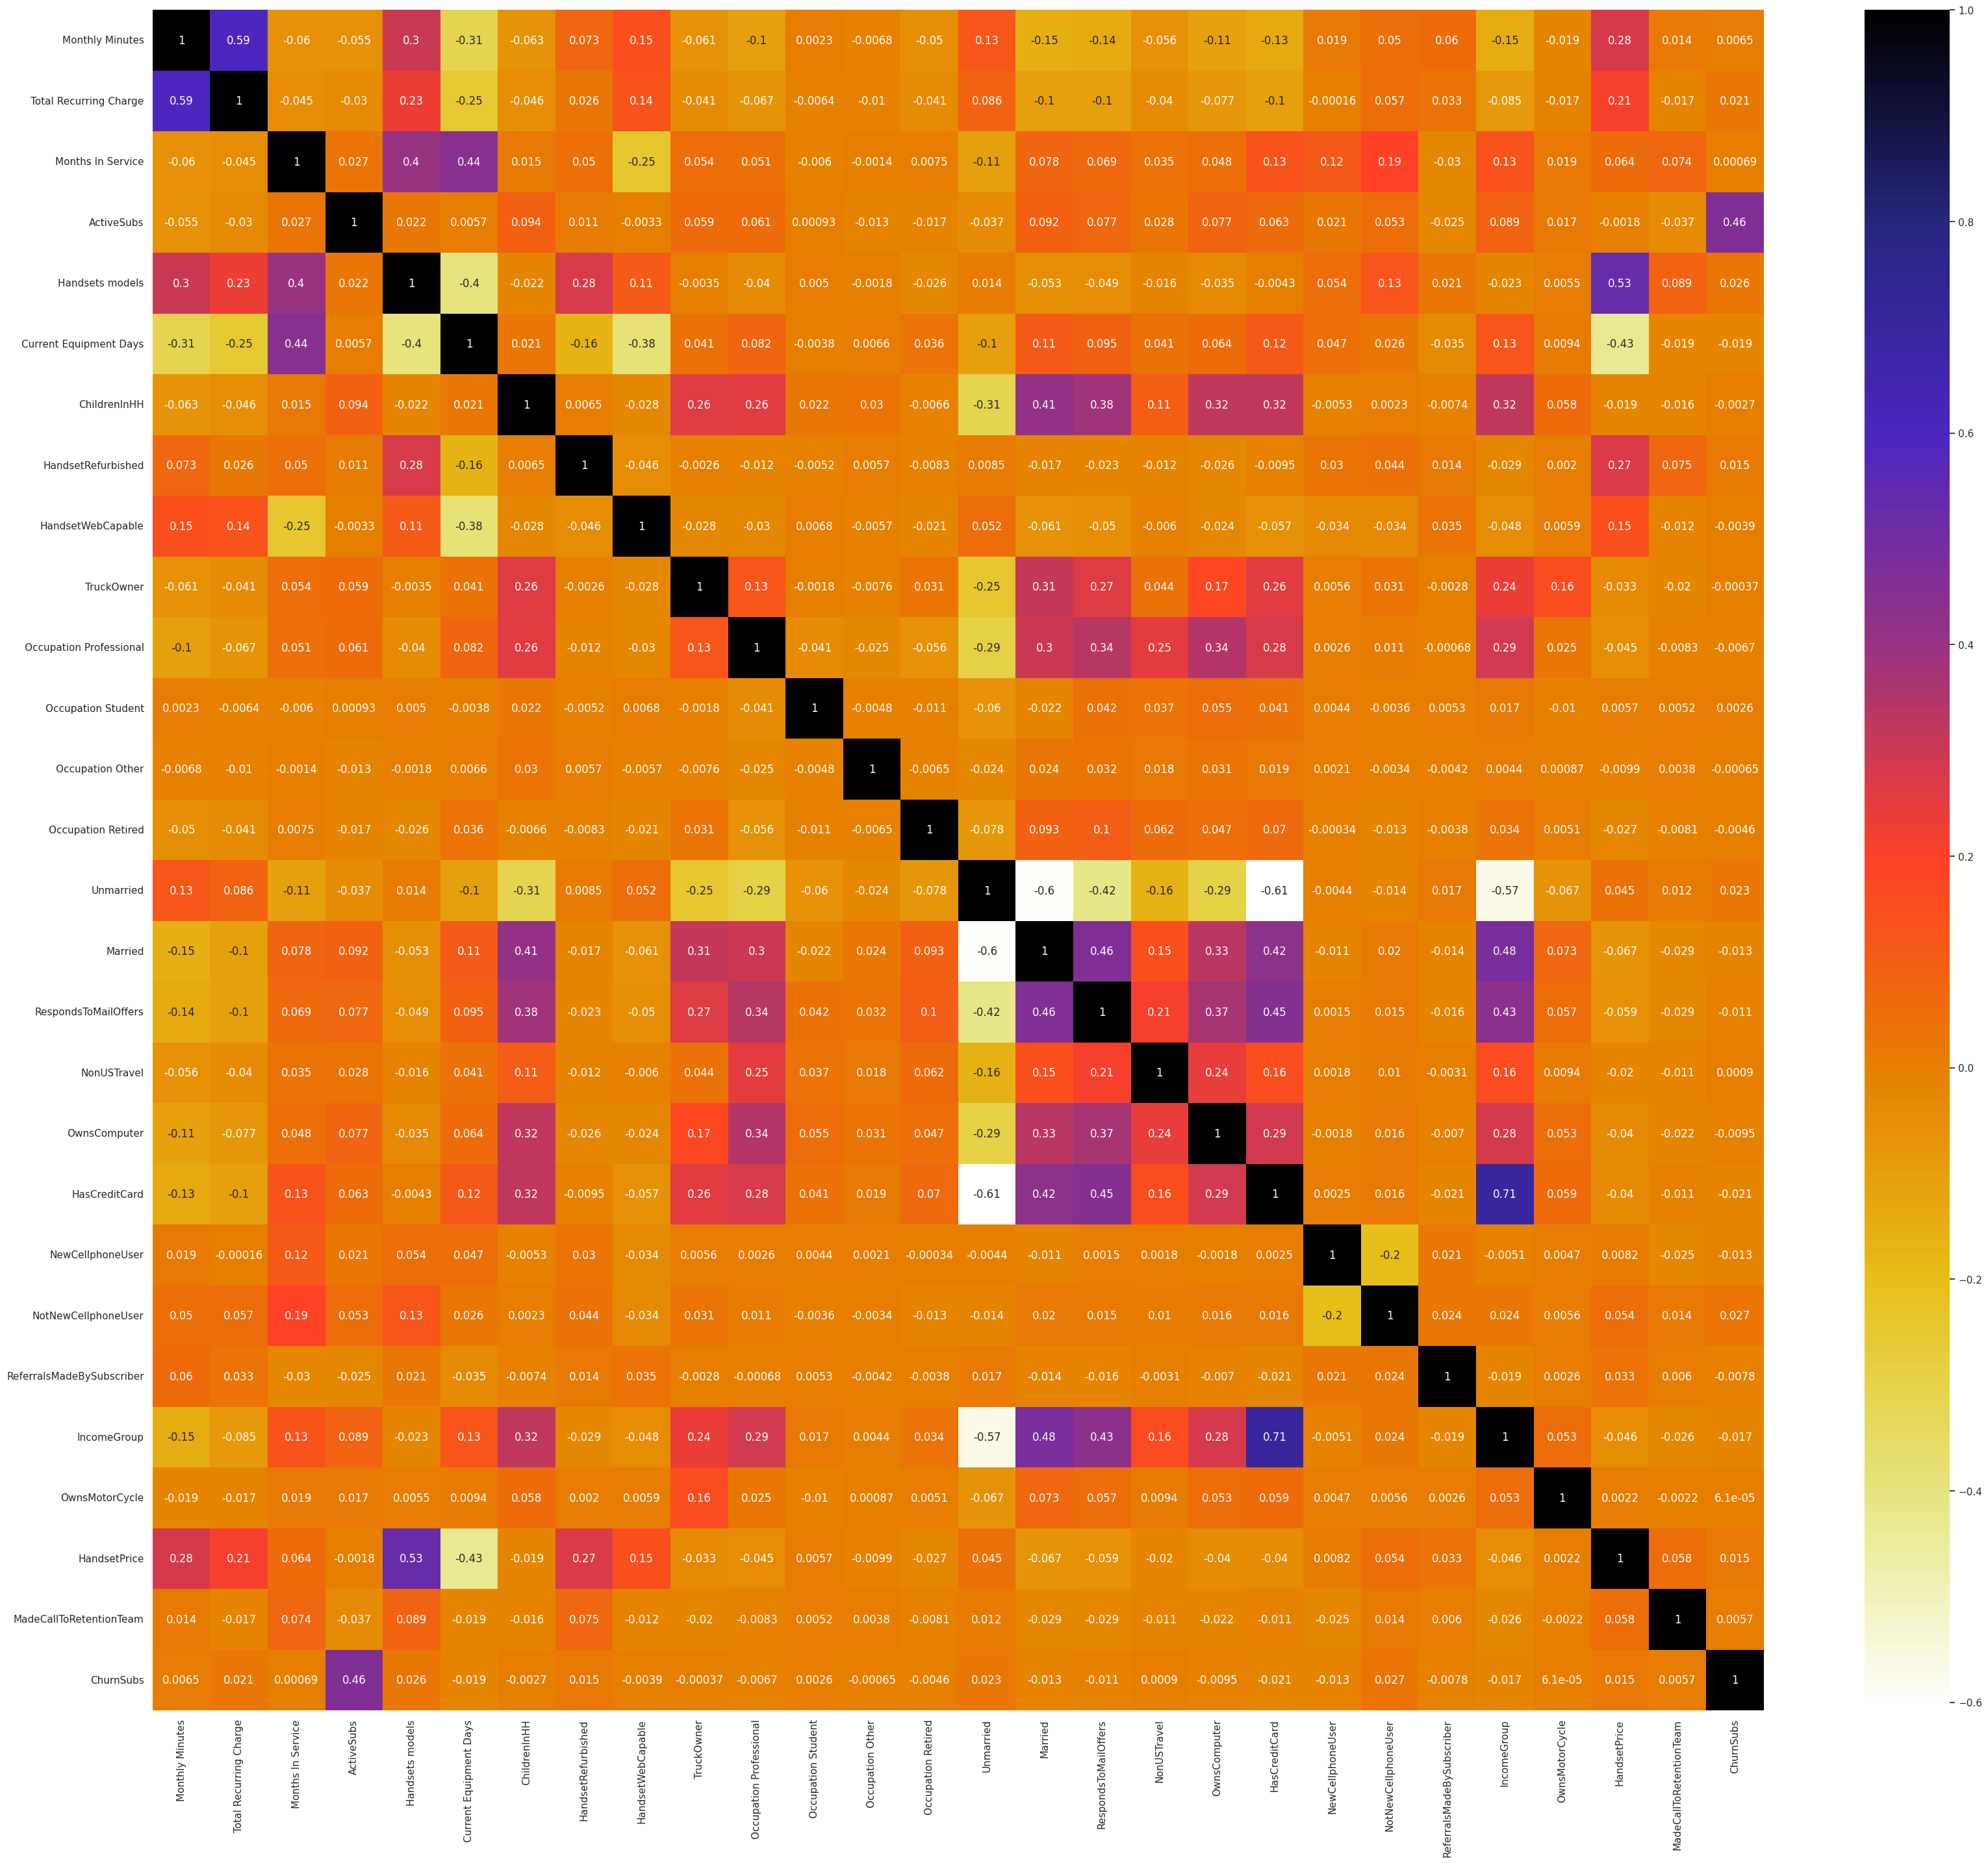

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(40,34))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# Finding highly correlated features
threshold = 0.8
highly_correlated = (cor.abs() > threshold) & (cor != 1)

# Getting the indices of highly correlated features
indices = [(i, j) for i in range(cor.shape[0]) for j in range(i+1, cor.shape[1]) if highly_correlated.iloc[i, j]]

# Printing the highly correlated features
for i, j in indices:
    print(f"Features '{x_train.columns[i]}' and '{x_train.columns[j]}' are highly correlated with a correlation of {cor.iloc[i, j]:.2f}")


In [ ]:
# Determining the mutual information
mutual_info = mutual_info_classif(x_train, b_train)
mutual_info

array([0.00741431, 0.01716529, 0.03720726, 0.00217935, 0.00127455,
       0.02695018, 0.        , 0.00198248, 0.01260127, 0.0015118 ,
       0.        , 0.00030952, 0.        , 0.        , 0.00203997,
       0.00011296, 0.00554683, 0.00019279, 0.00193151, 0.00134503,
       0.00460164, 0.        , 0.00151561, 0.00416932, 0.00187481,
       0.        , 0.        , 0.00047465])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Months In Service            0.037207
Current Equipment Days       0.026950
Total Recurring Charge       0.017165
HandsetWebCapable            0.012601
Monthly Minutes              0.007414
RespondsToMailOffers         0.005547
NewCellphoneUser             0.004602
IncomeGroup                  0.004169
ActiveSubs                   0.002179
Unmarried                    0.002040
HandsetRefurbished           0.001982
OwnsComputer                 0.001932
OwnsMotorCycle               0.001875
ReferralsMadeBySubscriber    0.001516
TruckOwner                   0.001512
HasCreditCard                0.001345
Handsets models              0.001275
ChurnSubs                    0.000475
Occupation Student           0.000310
NonUSTravel                  0.000193
Married                      0.000113
ChildrenInHH                 0.000000
NotNewCellphoneUser          0.000000
Occupation Retired           0.000000
Occupation Other             0.000000
HandsetPrice                 0.000000
MadeCallToRe

<Axes: >

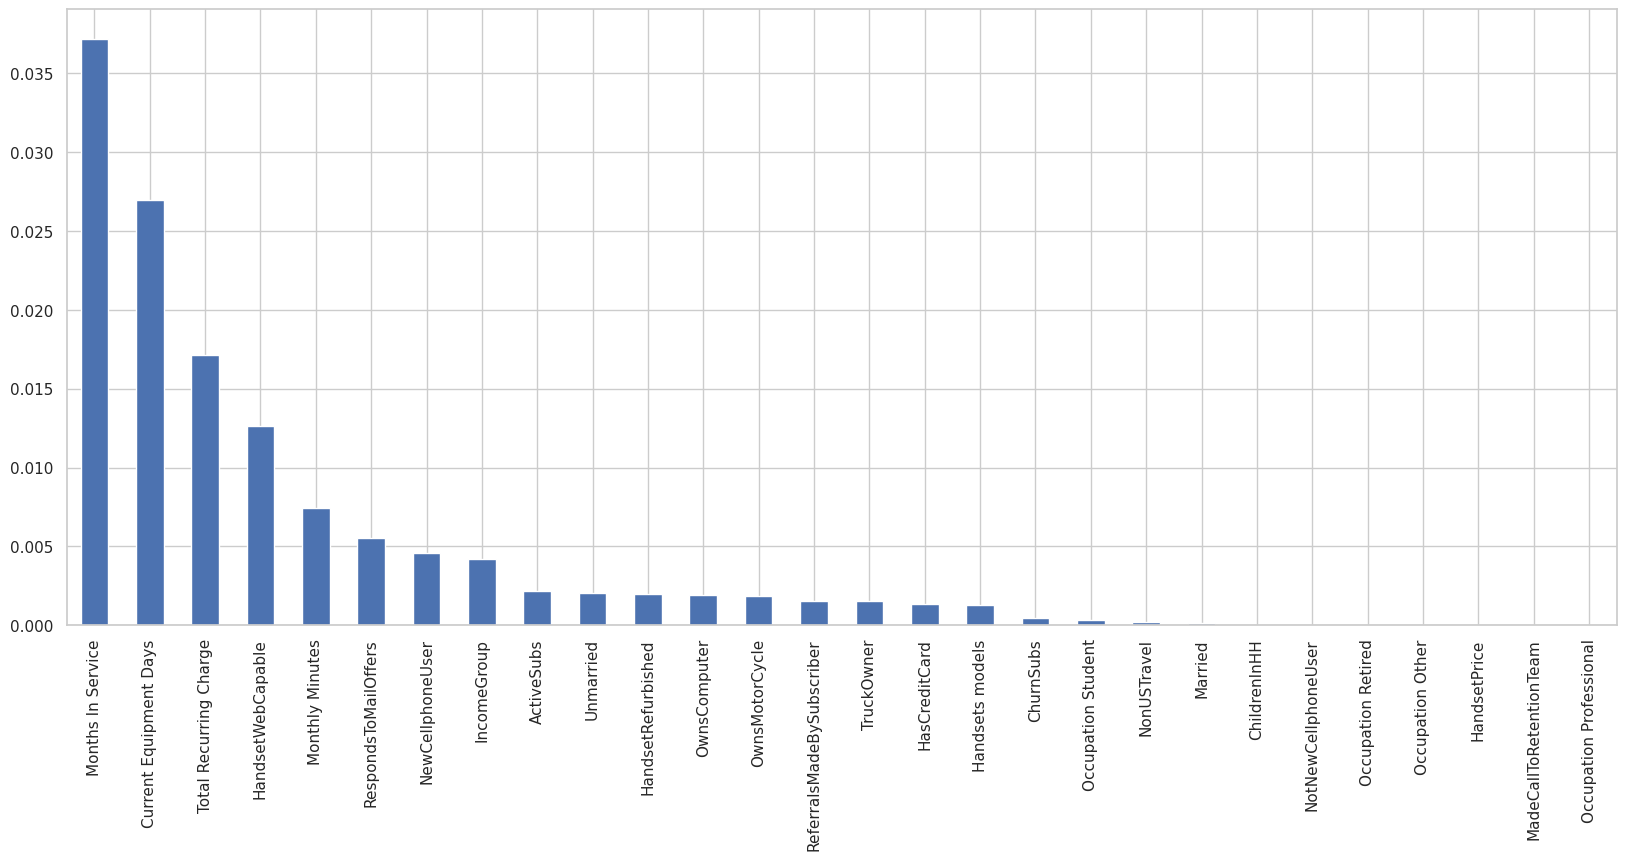

In [ ]:
#Plotting the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Getting the correlation of all features with 'Churn' column
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Printing the correlation values
print(churn_correlation)

Churn                        1.000000
Current Equipment Days       0.172279
Months In Service            0.121849
MadeCallToRetentionTeam      0.079752
Retention Calls              0.077015
HandsetRefurbished           0.047261
RetentionOffersAccepted      0.044909
ChurnSubs                    0.033797
NotNewCellphoneUser          0.031599
UniqueSubs                   0.030597
TruckOwner                   0.016915
HasCreditCard                0.016329
NewCellphoneUser             0.014602
ActiveSubs                   0.014278
IncomeGroup                  0.014158
RVOwner                      0.013222
PercChangeRevenues           0.011290
Overage Minutes              0.010902
ChildrenInHH                 0.009270
OwnsMotorCycle               0.007980
Roaming Calls                0.007698
OwnsComputer                 0.006772
Occupation Other             0.005694
Occupation Student           0.005679
Married                      0.004919
Occupation Clerical          0.004372
Unmarried   

In [ ]:
x_train.drop(['ReferralsMadeBySubscriber', 'OwnsMotorCycle', 'Married', 'NonUSTravel', 'Handsets models', 'Occupation Retired', 'Occupation Professional', 'TruckOwner', 'HandsetRefurbished', 'ChurnSubs'], axis=1, inplace=True)


In [ ]:
x_test.drop(['ReferralsMadeBySubscriber', 'OwnsMotorCycle', 'Married', 'NonUSTravel', 'Handsets models', 'Occupation Retired', 'Occupation Professional', 'TruckOwner', 'HandsetRefurbished', 'ChurnSubs'], axis=1, inplace=True)


In [ ]:
x_val.drop(['ReferralsMadeBySubscriber', 'OwnsMotorCycle', 'Married', 'NonUSTravel', 'Handsets models', 'Occupation Retired', 'Occupation Professional', 'TruckOwner', 'HandsetRefurbished', 'ChurnSubs'], axis=1, inplace=True)


**Normalizing the Dataset**

In [ ]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fiting and transforming the scaler on the training set
x_train_normalized = scaler.fit_transform(x_train)

# Applying the same transformation to the validation set
x_val_normalized = scaler.transform(x_val)

# Applying the same transformation to the testing set
x_test_normalized = scaler.transform(x_test)

**Balancing the Dataset using SMOTE**

In [ ]:
#Balancing the dataset
smote = SMOTE(random_state=42)
x_train_smote, b_train_smote = smote.fit_resample(x_train_normalized, b_train)

# **Model 1: Logistic Regression**

In [ ]:
# Defining the logistic regression model with L1 regularization
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)

# Defining the logistic regression model with L2 regularization
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, max_iter=1000)

# Performing k-fold cross-validation and get AUC for each fold for L1 penalty
cv_scores_auc_l1 = cross_val_score(lr_l1, x_train_smote, b_train_smote, cv=10, scoring='roc_auc')

# Performing k-fold cross-validation and get AUC for each fold for L2 penalty
cv_scores_auc_l2 = cross_val_score(lr_l2, x_train_smote, b_train_smote, cv=10, scoring='roc_auc')

# Calculating the average AUC for L1 penalty
avg_auc_l1 = np.mean(cv_scores_auc_l1)

# Calculating the average AUC for L2 penalty
avg_auc_l2 = np.mean(cv_scores_auc_l2)

# Printing the results
print(f'AUC for L1 Penalty: {avg_auc_l1:.4f}')
print(f'AUC for L2 Penalty: {avg_auc_l2:.4f}')


AUC for L1 Penalty: 0.6666
AUC for L2 Penalty: 0.6666


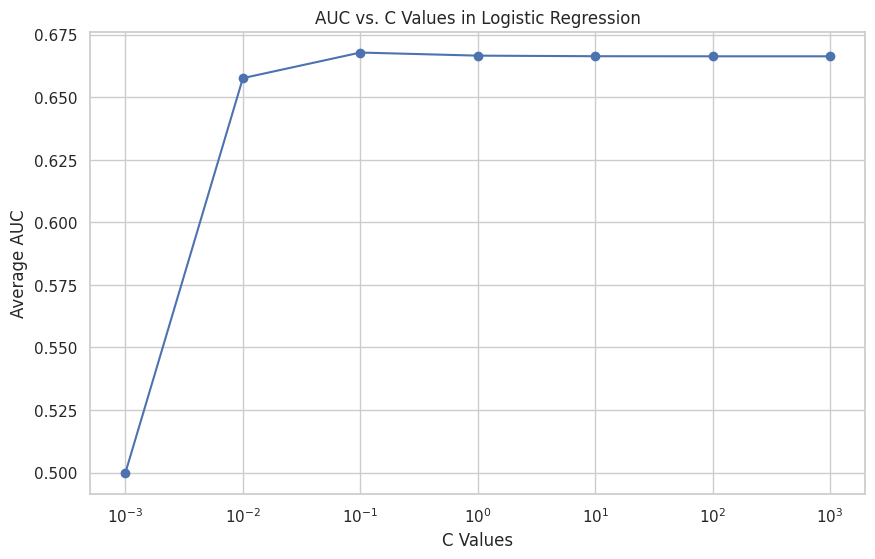

In [ ]:
# Defining the logistic regression model with L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Iterating over different C values to explore AUC
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
avg_auc_scores = []

for C_val in C_values:
    lr = LogisticRegression(penalty='l1', solver='liblinear', C=C_val, max_iter=1000)

    # Performing k-fold cross-validation and get AUC for each fold
    cv_scores_auc = cross_val_score(lr, x_train_smote, b_train_smote, cv=10, scoring='roc_auc')

    # Calculating the average AUC
    avg_auc_score = np.mean(cv_scores_auc)

    # Storing results
    avg_auc_scores.append(avg_auc_score)

# Ploting the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, avg_auc_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('C Values')
plt.ylabel('Average AUC')
plt.title('AUC vs. C Values in Logistic Regression')
plt.grid(True)
plt.show()

In [ ]:
# Chosing the desired C value based on the AUC graph
selected_C = 0.1

# Training the logistic regression model with the selected C value on the entire training dataset
lr = LogisticRegression(penalty='l1', solver='liblinear', C=selected_C, max_iter=1000)
lr.fit(x_train_smote, b_train_smote)

# Making predictions on the training, validation, and test sets
y_train_pred = lr.predict(x_train_smote)
y_val_pred = lr.predict(x_val_normalized)
y_test_pred = lr.predict(x_test_normalized)

# Evaluating the model performance on the training, validation, and test sets
print('Training Classification Report:\n', classification_report(b_train_smote, y_train_pred))
print('Validation Classification Report:\n', classification_report(b_val, y_val_pred))
print('Testing Classification Report:\n', classification_report(b_test, y_test_pred))
print('Training Confusion Matrix:\n', confusion_matrix(b_train_smote, y_train_pred))
print('Testing Confusion Matrix:\n', confusion_matrix(b_test, y_test_pred))
print('Validation Confusion Matrix:\n', confusion_matrix(b_val, y_val_pred))

# Using cross-validation to evaluate the model on multiple folds
cv_scores = cross_val_score(lr, x_train_smote, b_train_smote, cv=10, scoring='accuracy')

# Calculating the average cross-validation score
avg_cv_score = np.mean(cv_scores)

# Displaying the average cross-validation score as a percentage
print(f'Average k-fold cross validation (cv=10) percentage: {avg_cv_score:.2%}')

Training Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64     17663
           1       0.63      0.56      0.59     17663

    accuracy                           0.62     35326
   macro avg       0.62      0.62      0.62     35326
weighted avg       0.62      0.62      0.62     35326

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74     17710
           1       0.32      0.53      0.40      5227

    accuracy                           0.64     22937
   macro avg       0.58      0.60      0.57     22937
weighted avg       0.71      0.64      0.66     22937

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74     15065
           1       0.34      0.55      0.42      4595

    accuracy                           0.64     19660
   macro avg       0.58     

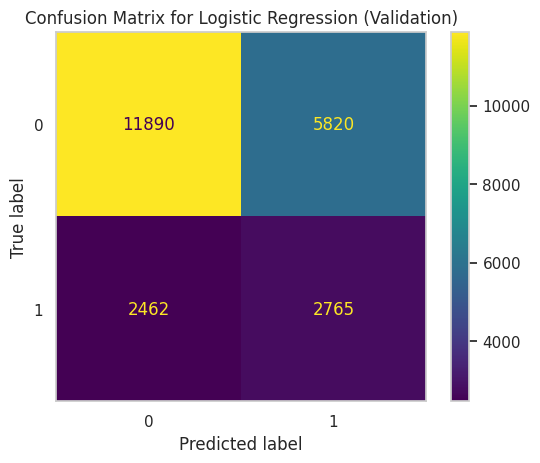

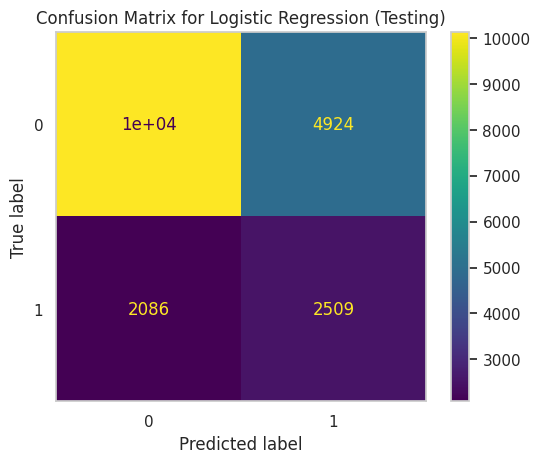

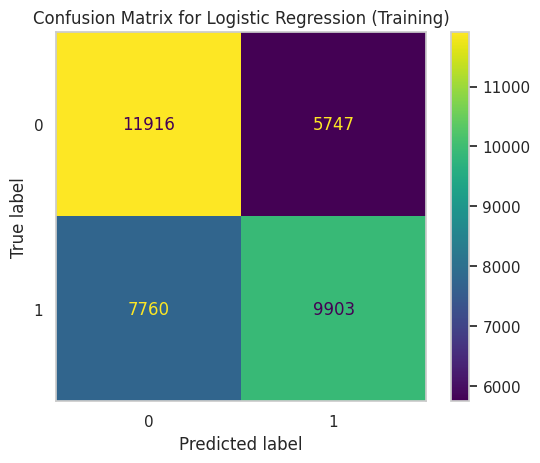

In [ ]:
#Plotting Confusion Matrices
# Computing the confusion matrix
confusion_val = confusion_matrix(b_val, y_val_pred)
confusion_test = confusion_matrix(b_test, y_test_pred)
confusion_train = confusion_matrix(b_train_smote, y_train_pred)

# Displaying the confusion matrices
display_val = ConfusionMatrixDisplay(confusion_matrix=confusion_val)
display_val.plot()
plt.title('Confusion Matrix for Logistic Regression (Validation)')
plt.grid(False)
plt.show()

display_test = ConfusionMatrixDisplay(confusion_matrix=confusion_test)
display_test.plot()
plt.title('Confusion Matrix for Logistic Regression (Testing)')
plt.grid(False)
plt.show()

display_train = ConfusionMatrixDisplay(confusion_matrix=confusion_train)
display_train.plot()
plt.title('Confusion Matrix for Logistic Regression (Training)')
plt.grid(False)
plt.show()


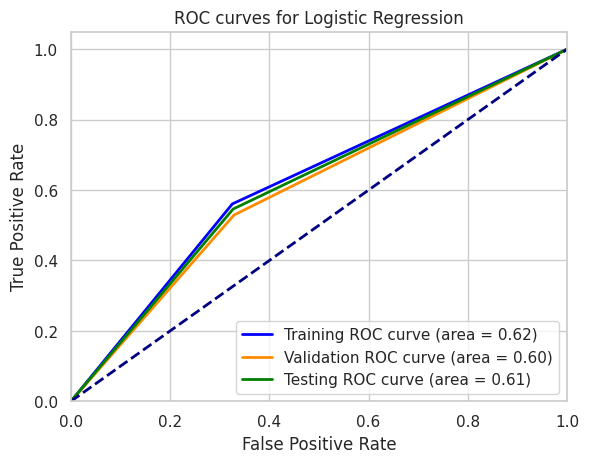

In [ ]:
#Plotting AUC-ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(b_train_smote, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, thresholds_val = roc_curve(b_val, y_val_pred)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, thresholds_test = roc_curve(b_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train)  # Add this line for training ROC curve
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Testing ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# **Model 2: Random Forest**

In [ ]:
# Initializing the Random Forest classifier with fixed hyperparameters
rf_model = GradientBoostingClassifier(n_estimators=20, max_depth=3, min_samples_split=7, min_samples_leaf=2, max_features='sqrt', random_state=42)

# Performing cross-validation
cv_scores = cross_val_score(rf_model, x_train_smote, b_train_smote, cv=10, scoring='accuracy')

# Calculating the average cross-validation score
avg_cv_score = cv_scores.mean() * 100  # Convert to percentage

# Fitting the model on the training data
rf_model.fit(x_train_smote, b_train_smote)

# Evaluating on the training set
b_train_pred = rf_model.predict(x_train_smote)
train_accuracy = accuracy_score(b_train_smote, b_train_pred) * 100
print('Training Accuracy Score:', train_accuracy)
print('Training Confusion Matrix:\n', confusion_matrix(b_train_smote, b_train_pred))
print('Training Classification Report:\n', classification_report(b_train_smote, b_train_pred))

# Evaluating on the validation set
b_val_pred = rf_model.predict(x_val_normalized)
val_accuracy = accuracy_score(b_val, b_val_pred) * 100
print('Validation Accuracy Score:', val_accuracy)
print('Validation Confusion Matrix:\n', confusion_matrix(b_val, b_val_pred))
print('Validation Classification Report:\n', classification_report(b_val, b_val_pred))

# Evaluating on the testing set
b_test_pred = rf_model.predict(x_test_normalized)
test_accuracy = accuracy_score(b_test, b_test_pred) * 100
print('Testing Accuracy Score:', test_accuracy)
print('Testing Confusion Matrix:\n', confusion_matrix(b_test, b_test_pred))
print('Testing Classification Report:\n', classification_report(b_test, b_test_pred))

# Displaying the average cross-validation score as a percentage
print(f'Average k-fold cross validation (cv=10) percentage: {avg_cv_score:.2f}%')


Training Accuracy Score: 68.73973843627923
Training Confusion Matrix:
 [[10243  7420]
 [ 3623 14040]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.58      0.65     17663
           1       0.65      0.79      0.72     17663

    accuracy                           0.69     35326
   macro avg       0.70      0.69      0.68     35326
weighted avg       0.70      0.69      0.68     35326

Validation Accuracy Score: 59.689584514103856
Validation Confusion Matrix:
 [[10228  7482]
 [ 1764  3463]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.58      0.69     17710
           1       0.32      0.66      0.43      5227

    accuracy                           0.60     22937
   macro avg       0.58      0.62      0.56     22937
weighted avg       0.73      0.60      0.63     22937

Testing Accuracy Score: 60.17293997965412
Testing Confusion Matrix:
 

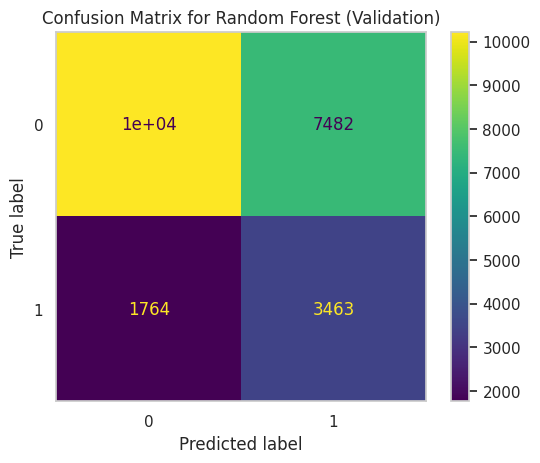

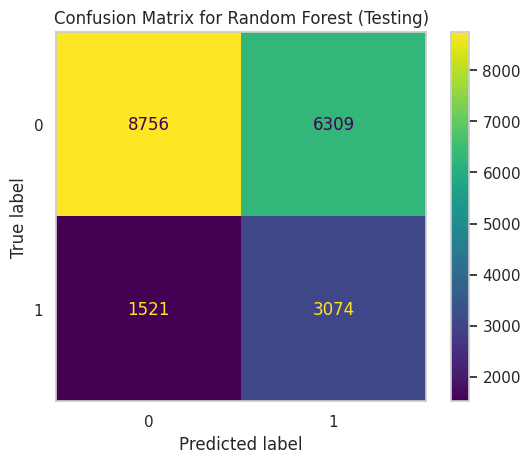

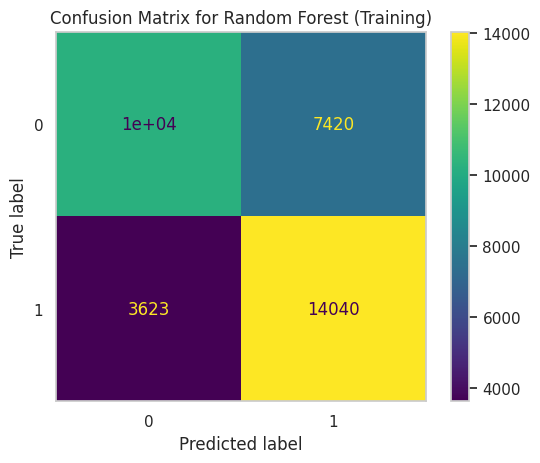

In [ ]:
# Plotting the confusion matrices for validation and testing results
confusion_val1 = confusion_matrix(b_val, b_val_pred)
display_val1 = ConfusionMatrixDisplay(confusion_matrix=confusion_val1)
display_val1.plot()
plt.title('Confusion Matrix for Random Forest (Validation)')
plt.grid(False)
plt.show()

confusion_test1 = confusion_matrix(b_test, b_test_pred)
display_test1 = ConfusionMatrixDisplay(confusion_matrix=confusion_test1)
display_test1.plot()
plt.title('Confusion Matrix for Random Forest (Testing)')
plt.grid(False)
plt.show()

confusion_train1 = confusion_matrix(b_train_smote, b_train_pred)
display_train1 = ConfusionMatrixDisplay(confusion_matrix=confusion_train1)
display_train1.plot()
plt.title('Confusion Matrix for Random Forest (Training)')
plt.grid(False)
plt.show()


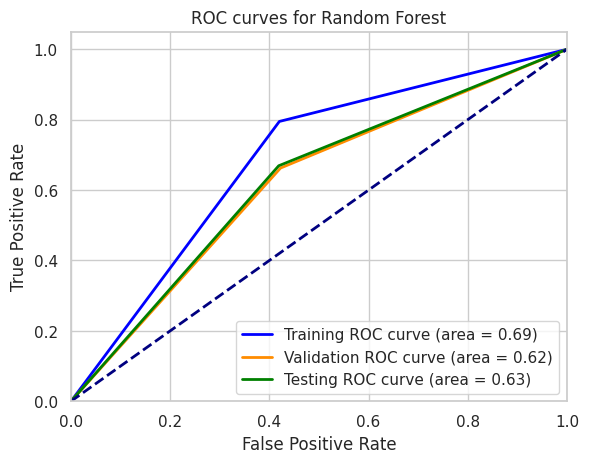

In [ ]:
#Plotting AUC-ROC Curve
# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for training set
fpr_train1, tpr_train1, thresholds_train1 = roc_curve(b_train_smote, b_train_pred)
roc_auc_train1 = auc(fpr_train1, tpr_train1)

# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for validation set
fpr_val1, tpr_val1, thresholds_val1 = roc_curve(b_val, b_val_pred)
roc_auc_val1 = auc(fpr_val1, tpr_val1)

# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for testing set
fpr_test1, tpr_test1, thresholds_test1 = roc_curve(b_test, b_test_pred)
roc_auc_test1 = auc(fpr_test1, tpr_test1)

# Plotting ROC curves for all three sets
plt.figure()
plt.plot(fpr_train1, tpr_train1, color='blue', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train1)
plt.plot(fpr_val1, tpr_val1, color='darkorange', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val1)
plt.plot(fpr_test1, tpr_test1, color='green', lw=2, label='Testing ROC curve (area = %0.2f)' % roc_auc_test1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for Random Forest')
plt.legend(loc="lower right")
plt.show()


# **Model 3: Support Vector Machine**

In [ ]:
# Initializing the SVM model
svm_model = SVC(kernel='linear', C=0.1, random_state=1234)

# Training the SVM model on the training data
svm_model.fit(x_train_smote, b_train_smote)

# Predicting on the validation data
b_val_pred2 = svm_model.predict(x_val_normalized)

# Predicting on the testing data
b_test_pred2 = svm_model.predict(x_test_normalized)

# Predicting on the training data
b_train_pred2 = svm_model.predict(x_train_smote)

# Classification Report for training data
print('Training Classification Report:\n', classification_report(b_train_smote, b_train_pred2))

# Classification Report for validation data
print('Validation Classification Report:\n', classification_report(b_val, b_val_pred2))

# Classification Report for testing data
print('Testing Classification Report:\n', classification_report(b_test, b_test_pred2))

# k-fold cross-validation
k_fold_scores = cross_val_score(svm_model, x_train_smote, b_train_smote, cv=10)
# Calculating the average cross-validation score
avg_cv_score2 = k_fold_scores.mean() * 100  # Converting to percentage

# Displaying the average cross-validation score as a percentage
print(f'Average k-fold cross validation (cv=10) percentage: {avg_cv_score2:.2f}%')

Training Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.70      0.64     17663
           1       0.63      0.52      0.57     17663

    accuracy                           0.61     35326
   macro avg       0.61      0.61      0.61     35326
weighted avg       0.61      0.61      0.61     35326

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76     17710
           1       0.32      0.49      0.39      5227

    accuracy                           0.65     22937
   macro avg       0.57      0.59      0.57     22937
weighted avg       0.71      0.65      0.67     22937

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76     15065
           1       0.34      0.51      0.41      4595

    accuracy                           0.66     19660
   macro avg       0.58     

In [ ]:
print('Training Confusion Matrix:\n', confusion_matrix(b_train_smote, b_train_pred2))
print('val Confusion Matrix:\n', confusion_matrix(b_val, b_val_pred2))
print('Testing Confusion Matrix:\n', confusion_matrix(b_test, b_test_pred2))

Training Confusion Matrix:
 [[12383  5280]
 [ 8545  9118]]
val Confusion Matrix:
 [[12384  5326]
 [ 2667  2560]]
Testing Confusion Matrix:
 [[10567  4498]
 [ 2242  2353]]


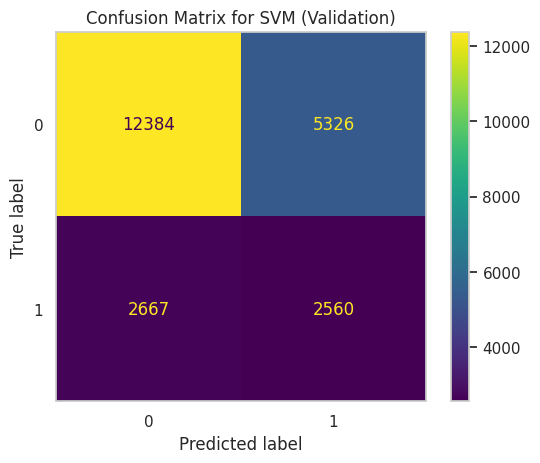

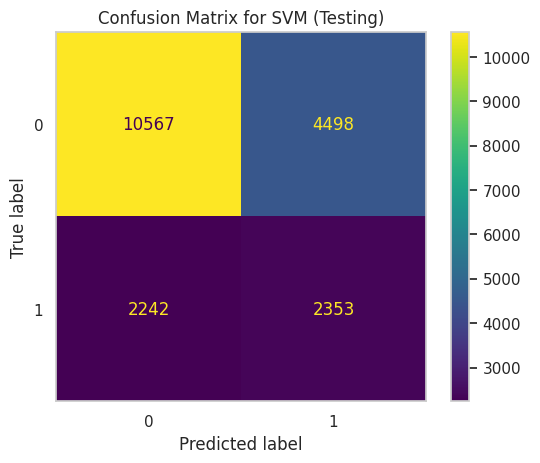

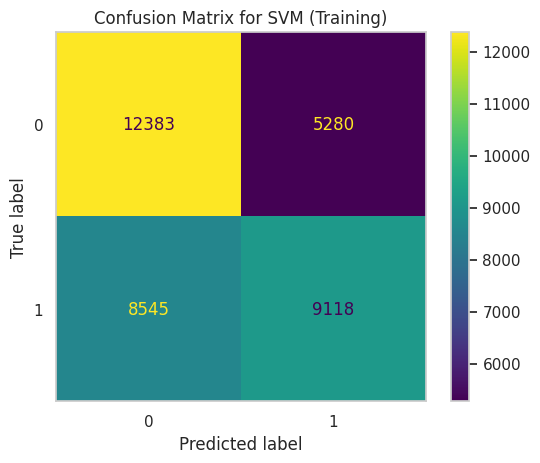

In [ ]:
#Plotting Confusion Matrices
# Confusion matrix for validation data
confusion_val2 = confusion_matrix(b_val, b_val_pred2)
display_val2 = ConfusionMatrixDisplay(confusion_matrix=confusion_val2)

# Plotting the confusion matrix for validation data
display_val2.plot()
plt.title('Confusion Matrix for SVM (Validation)')
plt.grid(False)
plt.show()

# Confusion matrix for testing data
confusion_test2 = confusion_matrix(b_test, b_test_pred2)
display_test2 = ConfusionMatrixDisplay(confusion_matrix=confusion_test2)

# Plotting the confusion matrix for testing data
display_test2.plot()
plt.title('Confusion Matrix for SVM (Testing)')
plt.grid(False)
plt.show()

# Confusion matrix for training data
confusion_train2 = confusion_matrix(b_train_smote, b_train_pred2)
display_train2 = ConfusionMatrixDisplay(confusion_matrix=confusion_train2)

# Plotting the confusion matrix for testing data
display_train2.plot()
plt.title('Confusion Matrix for SVM (Training)')
plt.grid(False)
plt.show()


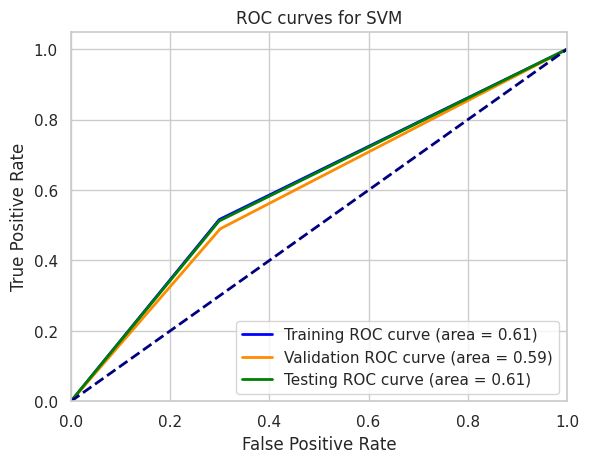

In [ ]:
#Plotting AUC-ROC Curve
# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for training set
fpr_train2, tpr_train2, thresholds_train2 = roc_curve(b_train_smote, b_train_pred2)
roc_auc_train2 = auc(fpr_train2, tpr_train2)

# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for validation set
fpr_val2, tpr_val2, thresholds_val2 = roc_curve(b_val, b_val_pred2)
roc_auc_val2 = auc(fpr_val2, tpr_val2)

# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for testing set
fpr_test2, tpr_test2, thresholds_test2 = roc_curve(b_test, b_test_pred2)
roc_auc_test2 = auc(fpr_test2, tpr_test2)

# Plotting ROC curves for all three sets
plt.figure()
plt.plot(fpr_train2, tpr_train2, color='blue', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train2)
plt.plot(fpr_val2, tpr_val2, color='darkorange', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val2)
plt.plot(fpr_test2, tpr_test2, color='green', lw=2, label='Testing ROC curve (area = %0.2f)' % roc_auc_test2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for SVM')
plt.legend(loc="lower right")
plt.show()

# **Model 4: CNN**

Epoch 1/150
442/442 [==============================] - 3s 4ms/step - loss: 0.2355 - accuracy: 0.6241 - val_loss: 0.3676 - val_accuracy: 0.0000e+00
Epoch 2/150
442/442 [==============================] - 2s 5ms/step - loss: 0.2327 - accuracy: 0.6255 - val_loss: 0.3703 - val_accuracy: 0.0000e+00
Epoch 3/150
442/442 [==============================] - 2s 6ms/step - loss: 0.2310 - accuracy: 0.6262 - val_loss: 0.3648 - val_accuracy: 0.0316
Epoch 4/150
442/442 [==============================] - 2s 4ms/step - loss: 0.2289 - accuracy: 0.6264 - val_loss: 0.3759 - val_accuracy: 0.0522
Epoch 5/150
442/442 [==============================] - 2s 4ms/step - loss: 0.2271 - accuracy: 0.6297 - val_loss: 0.3846 - val_accuracy: 0.0732
Epoch 6/150
442/442 [==============================] - 2s 4ms/step - loss: 0.2246 - accuracy: 0.6303 - val_loss: 0.3762 - val_accuracy: 0.0916
Epoch 7/150
442/442 [==============================] - 2s 4ms/step - loss: 0.2230 - accuracy: 0.6275 - val_loss: 0.3581 - val_accuracy

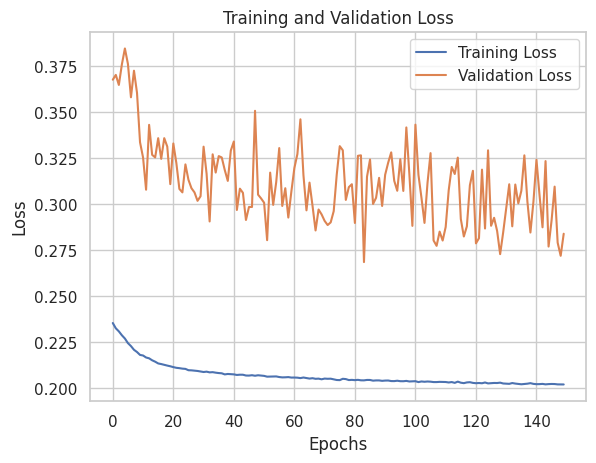

615/615 [==============================] - 1s 2ms/step
 Testing Accuracy: 0.6920142421159715
Testing Recall: 0.3843307943416757
Testing Precision: 0.35376602564102566
Testing F1 Score: 0.368415562741212
1104/1104 [==============================] - 2s 2ms/step
Training Accuracy: 0.6248655381305555
Training Recall: 0.4537734246730453
Training Precision: 0.6898184008950856
Training F1 Score: 0.5474352844751041
717/717 [==============================] - 1s 2ms/step
Validation Accuracy: 0.6959061777913415
Validation Recall: 0.38836808876984885
Validation Precision: 0.34951790633608815
Validation F1 Score: 0.367920253738106


In [ ]:
# Reshaping the input data for CNN
X_train = x_train_smote.reshape(x_train_smote.shape[0], x_train_smote.shape[1], 1)
X_test = x_test_normalized.reshape(x_test_normalized.shape[0], x_test.shape[1], 1)

model = models.Sequential()
model.add(layers.Conv1D(16, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.RMSprop(learning_rate=0.0001), metrics=['accuracy'])

# Training the model and store the history
history = model.fit(X_train, b_train_smote, epochs=150, batch_size=64, validation_split=0.2)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating the model on the testing data
test_pred_prob = model.predict(x_test_normalized)
test_pred = np.round(test_pred_prob)
accuracy_original = accuracy_score(b_test, test_pred)
recall_original = recall_score(b_test, test_pred)
precision_original = precision_score(b_test, test_pred)
f1_original = f1_score(b_test, test_pred)

print(f" Testing Accuracy: {accuracy_original}")
print(f"Testing Recall: {recall_original}")
print(f"Testing Precision: {precision_original}")
print(f"Testing F1 Score: {f1_original}")

# Evaluating the model on the training data
train_pred_prob = model.predict(X_train)
train_pred = np.round(train_pred_prob)

accuracy_train = accuracy_score(b_train_smote, train_pred)
recall_train = recall_score(b_train_smote, train_pred)
precision_train = precision_score(b_train_smote, train_pred)
f1_train = f1_score(b_train_smote, train_pred)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Recall: {recall_train}")
print(f"Training Precision: {precision_train}")
print(f"Training F1 Score: {f1_train}")

# Evaluating the model on the validation data
val_pred_prob = model.predict(x_val_normalized)
val_pred = np.round(val_pred_prob)

accuracy_val = accuracy_score(b_val, val_pred)
recall_val = recall_score(b_val, val_pred)
precision_val = precision_score(b_val, val_pred)
f1_val = f1_score(b_val, val_pred)

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation F1 Score: {f1_val}")


In [ ]:
print('Training Confusion Matrix:\n', confusion_matrix(b_train_smote, train_pred))
print('val Confusion Matrix:\n', confusion_matrix(b_val, val_pred))
print('Testing Confusion Matrix:\n', confusion_matrix(b_test, test_pred))

Training Confusion Matrix:
 [[14059  3604]
 [ 9648  8015]]
val Confusion Matrix:
 [[13932  3778]
 [ 3197  2030]]
Testing Confusion Matrix:
 [[11839  3226]
 [ 2829  1766]]


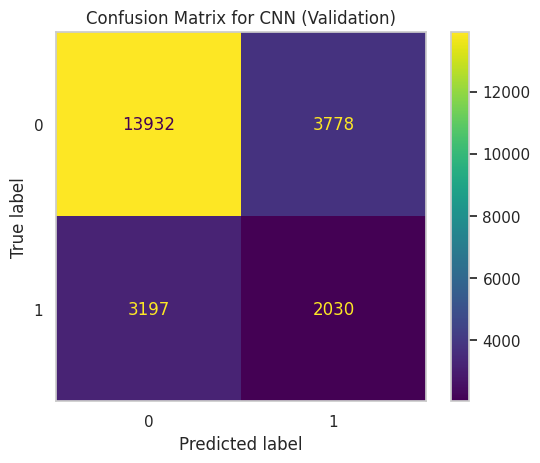

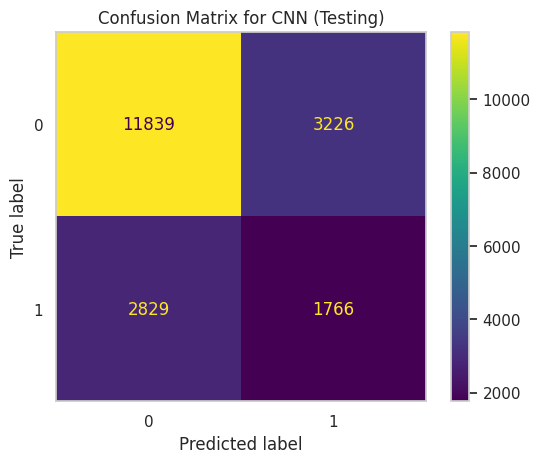

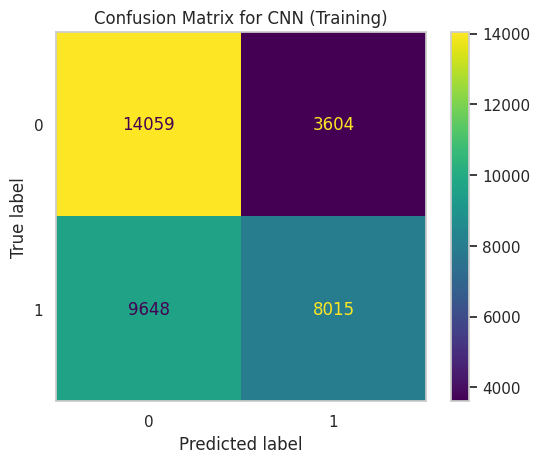

In [ ]:
#Plotting Confusion Matrices
# Confusion matrix for validation data
confusion_val3 = confusion_matrix(b_val, val_pred)
display_val3 = ConfusionMatrixDisplay(confusion_matrix=confusion_val3)

# Plotting the confusion matrix for validation data
display_val3.plot()
plt.title('Confusion Matrix for CNN (Validation)')
plt.grid(False)
plt.show()

# Confusion matrix for testing data
confusion_test3 = confusion_matrix(b_test, test_pred)
display_test3 = ConfusionMatrixDisplay(confusion_matrix=confusion_test3)

# Plotting the confusion matrix for testing data
display_test3.plot()
plt.title('Confusion Matrix for CNN (Testing)')
plt.grid(False)
plt.show()

# Confusion matrix for training data
confusion_train3 = confusion_matrix(b_train_smote, train_pred)
display_train3 = ConfusionMatrixDisplay(confusion_matrix=confusion_train3)

# Plotting the confusion matrix for testing data
display_train3.plot()
plt.title('Confusion Matrix for CNN (Training)')
plt.grid(False)
plt.show()


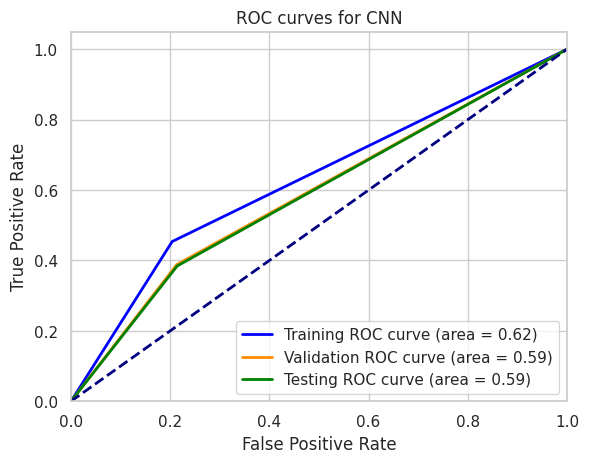

In [ ]:
#Plotting AUC-ROC Curve
# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for training set
fpr_train3, tpr_train3, thresholds_train3 = roc_curve(b_train_smote, train_pred)
roc_auc_train3 = auc(fpr_train3, tpr_train3)

# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for validation set
fpr_val3, tpr_val3, thresholds_val3 = roc_curve(b_val, val_pred)
roc_auc_val3 = auc(fpr_val3, tpr_val3)

# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for testing set
fpr_test3, tpr_test3, thresholds_test3 = roc_curve(b_test, test_pred)
roc_auc_test3 = auc(fpr_test3, tpr_test3)

# Plotting ROC curves for all three sets
plt.figure()
plt.plot(fpr_train3, tpr_train3, color='blue', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train3)
plt.plot(fpr_val3, tpr_val3, color='darkorange', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val3)
plt.plot(fpr_test3, tpr_test3, color='green', lw=2, label='Testing ROC curve (area = %0.2f)' % roc_auc_test3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for CNN')
plt.legend(loc="lower right")
plt.show()

# **Model 5: Autoencoder**

Epoch 1/100
125/125 [==============================] - 1s 5ms/step - loss: 0.1012 - val_loss: 0.0864
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0657 - val_loss: 0.0565
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0482 - val_loss: 0.0421
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0339 - val_loss: 0.0273
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0210 - val_loss: 0.0172
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0108
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0083
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.0067
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 10/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0067 - val_lo

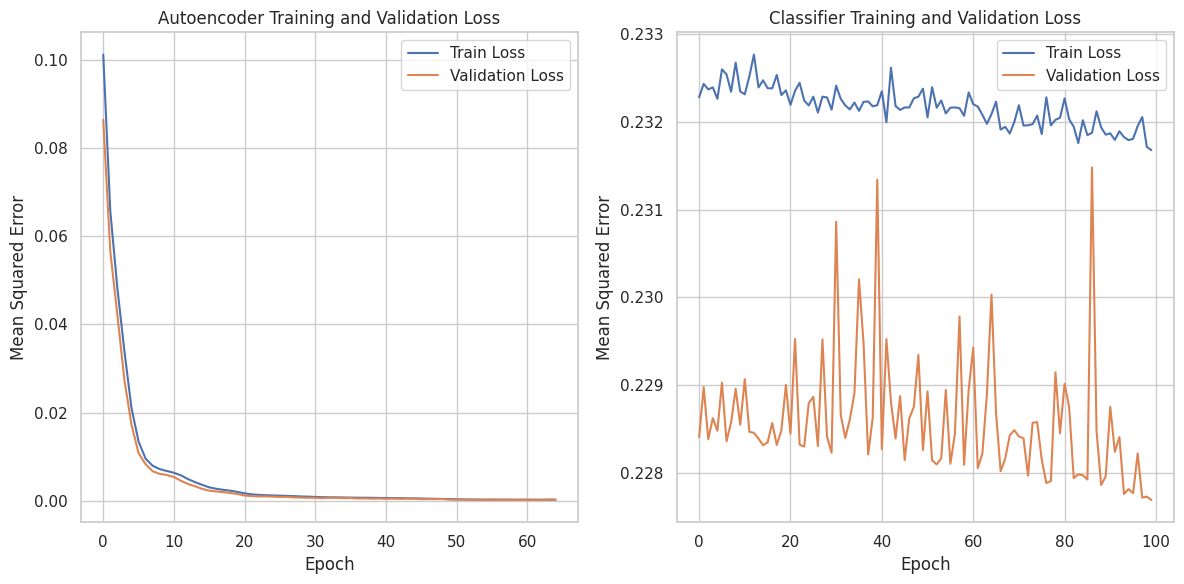

1104/1104 [==============================] - 1s 1ms/step
Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.2563 - accuracy: 0.5134 - val_loss: 0.2493 - val_accuracy: 0.5149
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.5302 - val_loss: 0.2473 - val_accuracy: 0.5577
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.5561 - val_loss: 0.2458 - val_accuracy: 0.5832
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.5625 - val_loss: 0.2448 - val_accuracy: 0.5750
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.5701 - val_loss: 0.2438 - val_accuracy: 0.5729
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.5731 - val_loss: 0.2425 - val_accuracy: 0.5824
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2428 - a

In [ ]:
# Defining the autoencoder model
input_size = X_train.shape[1]
encoding_dimension = 16

# Encoder
Encoder_input = Input(shape=(input_size,))
Encoder_hidden = Dense(256, activation='sigmoid')(Encoder_input)
Encoder_hidden = Dense(encoding_dimension, activation='sigmoid')(Encoder_hidden)

# Creating the encoder model
Encoder = Model(Encoder_input, Encoder_hidden)

# Decoder
Decoder_input = Input(shape=(encoding_dimension,))
Decoder_hidden = Dense(256, activation='sigmoid')(Decoder_input)
Decoder_output = Dense(input_size, activation='linear')(Decoder_hidden)

# Creating the decoder model
Decoder = Model(Decoder_input, Decoder_output)

# Combining the encoder and decoder to create the autoencoder
Autoencoder_input = Input(shape=(input_size,))
Encoded = Encoder(Autoencoder_input)
Decoded = Decoder(Encoded)

# Creating the autoencoder model
Autoencoder = Model(Autoencoder_input, Decoded)

# Compiling the autoencoder model
Autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Defining early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fitting the autoencoder with early stopping
autoencoder_history = Autoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_split=0.1, callbacks=[early_stopping])

# Training the classifier
classifier_history = Classifier.fit(X_encoded_train, y_encoded_train, epochs=100, batch_size=256, validation_split=0.1)

# Plotting autoencoder training loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(autoencoder_history.history['loss'], label='Train Loss')
plt.plot(autoencoder_history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

# Plotting classifier training loss
plt.subplot(1, 2, 2)
plt.plot(classifier_history.history['loss'], label='Train Loss')
plt.plot(classifier_history.history['val_loss'], label='Validation Loss')
plt.title('Classifier Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()

# Obtaining encoded features
Encoded_features = Encoder.predict(X_train)

# Defining the classification model
Classifier_input = Input(shape=(encoding_dimension,))
Classifier_hidden = Dense(128, activation='sigmoid')(Classifier_input)
Classifier_output = Dense(1, activation='sigmoid')(Classifier_hidden)

# Building and compiling the classification model
Classifier = Model(inputs=Classifier_input, outputs=Classifier_output)
Classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Spliting the data for training the classifier
X_encoded_train, X_encoded_test, y_encoded_train, y_encoded_test = train_test_split(Encoded_features, b_train_smote, test_size=0.2, random_state=42)

# Training the classifier
Classifier.fit(X_encoded_train, y_encoded_train, epochs=100, batch_size=256, validation_split=0.1)

# Predicting on the test set
y_prediction = Classifier.predict(X_encoded_test)
y_pred_conversion = (y_prediction > 0.5).astype("int32")

# Evaluating the classifier
accuracy = accuracy_score(y_encoded_test, y_pred_conversion)
precision = precision_score(y_encoded_test, y_pred_conversion)
recall = recall_score(y_encoded_test, y_pred_conversion)
f1 = f1_score(y_encoded_test, y_pred_conversion)  # Add F1 score here
roc_auc = roc_auc_score(y_encoded_test, y_prediction)
confusion_matrix_result = confusion_matrix(y_encoded_test, y_pred_conversion)

# Evaluating on Training Set
y_prediction_train = Classifier.predict(X_encoded_train)
y_pred_conversion_train = (y_prediction_train > 0.5).astype("int32")

# Evaluating the classifier on the Training Set
accuracy_train = accuracy_score(y_encoded_train, y_pred_conversion_train)
precision_train = precision_score(y_encoded_train, y_pred_conversion_train)
recall_train = recall_score(y_encoded_train, y_pred_conversion_train)
f1_train = f1_score(y_encoded_train, y_pred_conversion_train)  # Add F1 score here
roc_auc_train = roc_auc_score(y_encoded_train, y_prediction_train)
confusion_matrix_train = confusion_matrix(y_encoded_train, y_pred_conversion_train)

# Evaluating on Validation Set
X_encoded_val = Encoder.predict(x_val_normalized)
y_prediction_val = Classifier.predict(X_encoded_val)
y_pred_conversion_val = (y_prediction_val > 0.5).astype("int32")

# Evaluating the classifier on the Validation Set
accuracy_val = accuracy_score(b_val, y_pred_conversion_val)
precision_val = precision_score(b_val, y_pred_conversion_val)
recall_val = recall_score(b_val, y_pred_conversion_val)
f1_val = f1_score(b_val, y_pred_conversion_val)  # Add F1 score here
roc_auc_val = roc_auc_score(b_val, y_prediction_val)
confusion_matrix_val = confusion_matrix(b_val, y_pred_conversion_val)

# Printing the evaluation results
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1 Score: {f1}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Confusion Matrix:\n{confusion_matrix_result}")

print(f"\nTrain Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_train}")
print(f"Train ROC AUC: {roc_auc_train}")
print(f"Train Confusion Matrix:\n{confusion_matrix_train}")

print(f"\nValidation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_val}")
print(f"Validation ROC AUC: {roc_auc_val}")
print(f"Validation Confusion Matrix:\n{confusion_matrix_val}")


In [ ]:
print('Training Confusion Matrix:\n', confusion_matrix(y_encoded_train, y_pred_conversion_train))
print('val Confusion Matrix:\n', confusion_matrix(b_val, y_pred_conversion_val))
print('Testing Confusion Matrix:\n', confusion_matrix(y_encoded_test, y_pred_conversion))

Training Confusion Matrix:
 [[9193 4957]
 [5858 8252]]
val Confusion Matrix:
 [[11464  6246]
 [ 2327  2900]]
Testing Confusion Matrix:
 [[2317 1196]
 [1440 2113]]


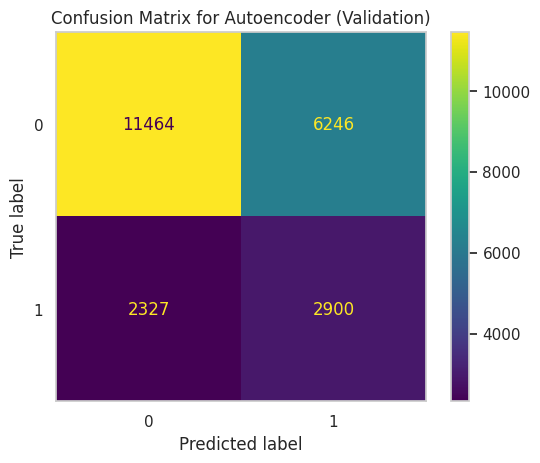

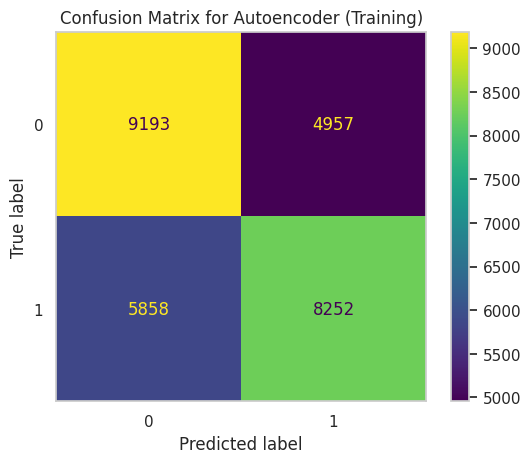

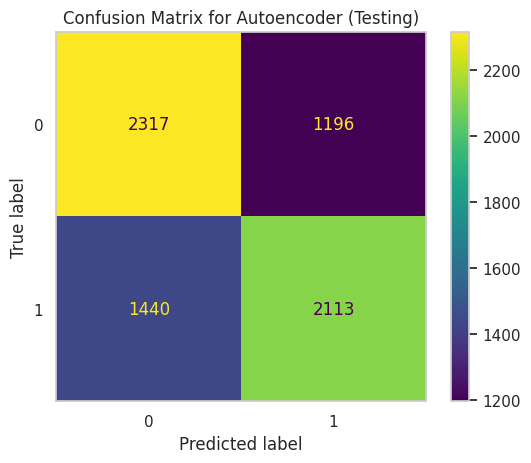

In [ ]:
#Plotting Confusion Matrices
# Confusion matrix for validation data
confusion_val4 = confusion_matrix(b_val, y_pred_conversion_val)
display_val4 = ConfusionMatrixDisplay(confusion_matrix=confusion_val4)

# Plotting the confusion matrix for validation data
display_val4.plot()
plt.title('Confusion Matrix for Autoencoder (Validation)')
plt.grid(False)
plt.show()

# Confusion matrix for training data
confusion_train4 = confusion_matrix(y_encoded_train, y_pred_conversion_train)
display_train4 = ConfusionMatrixDisplay(confusion_matrix=confusion_train4)

# Plotting the confusion matrix for training data
display_train4.plot()
plt.title('Confusion Matrix for Autoencoder (Training)')
plt.grid(False)
plt.show()

# Confusion matrix for testing data
confusion_test4 = confusion_matrix(y_encoded_test, y_pred_conversion)
display_test4 = ConfusionMatrixDisplay(confusion_matrix=confusion_test4)

# Plotting the confusion matrix for testing data
display_test4.plot()
plt.title('Confusion Matrix for Autoencoder (Testing)')
plt.grid(False)
plt.show()

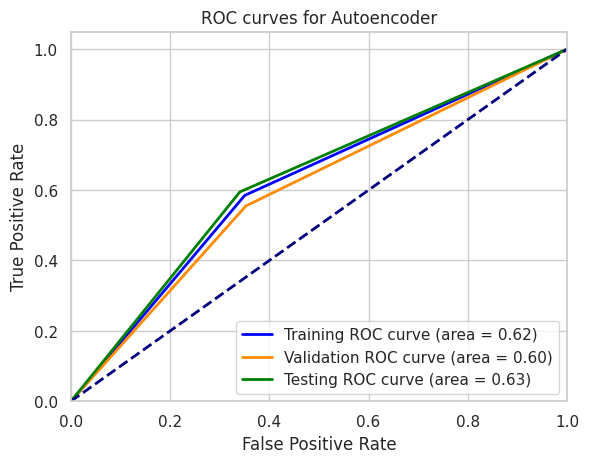

In [ ]:
#Plotting AUC-ROC Curve
# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for training set
fpr_train4, tpr_train4, thresholds_train4 = roc_curve(y_encoded_train, y_pred_conversion_train)
roc_auc_train4 = auc(fpr_train4, tpr_train4)

# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for validation set
fpr_val4, tpr_val4, thresholds_val4 = roc_curve(b_val, y_pred_conversion_val)
roc_auc_val4 = auc(fpr_val4, tpr_val4)

# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for testing set
fpr_test4, tpr_test4, thresholds_test4 = roc_curve(y_encoded_test, y_pred_conversion)
roc_auc_test4 = auc(fpr_test4, tpr_test4)

# Plotting ROC curves for all three sets
plt.figure()
plt.plot(fpr_train4, tpr_train4, color='blue', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train4)
plt.plot(fpr_val4, tpr_val4, color='darkorange', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val4)
plt.plot(fpr_test4, tpr_test4, color='green', lw=2, label='Testing ROC curve (area = %0.2f)' % roc_auc_test4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for Autoencoder')
plt.legend(loc="lower right")
plt.show()

# **Model 6: LSTM**

Epoch 1/200
884/884 [==============================] - 22s 23ms/step - loss: 1.6915 - accuracy: 0.6225 - val_loss: 1.2277 - val_accuracy: 0.0000e+00
Epoch 2/200
884/884 [==============================] - 20s 23ms/step - loss: 1.6861 - accuracy: 0.6264 - val_loss: 1.2689 - val_accuracy: 0.0000e+00
Epoch 3/200
884/884 [==============================] - 22s 25ms/step - loss: 1.7041 - accuracy: 0.6290 - val_loss: 1.2161 - val_accuracy: 0.0000e+00
Epoch 4/200
884/884 [==============================] - 19s 22ms/step - loss: 1.6398 - accuracy: 0.6309 - val_loss: 1.2153 - val_accuracy: 0.0000e+00
Epoch 5/200
884/884 [==============================] - 20s 22ms/step - loss: 1.6765 - accuracy: 0.6298 - val_loss: 1.2369 - val_accuracy: 0.0000e+00
Epoch 6/200
884/884 [==============================] - 23s 26ms/step - loss: 1.6719 - accuracy: 0.6295 - val_loss: 1.2159 - val_accuracy: 0.0000e+00
Epoch 7/200
884/884 [==============================] - 21s 24ms/step - loss: 1.6760 - accuracy: 0.6294 - v

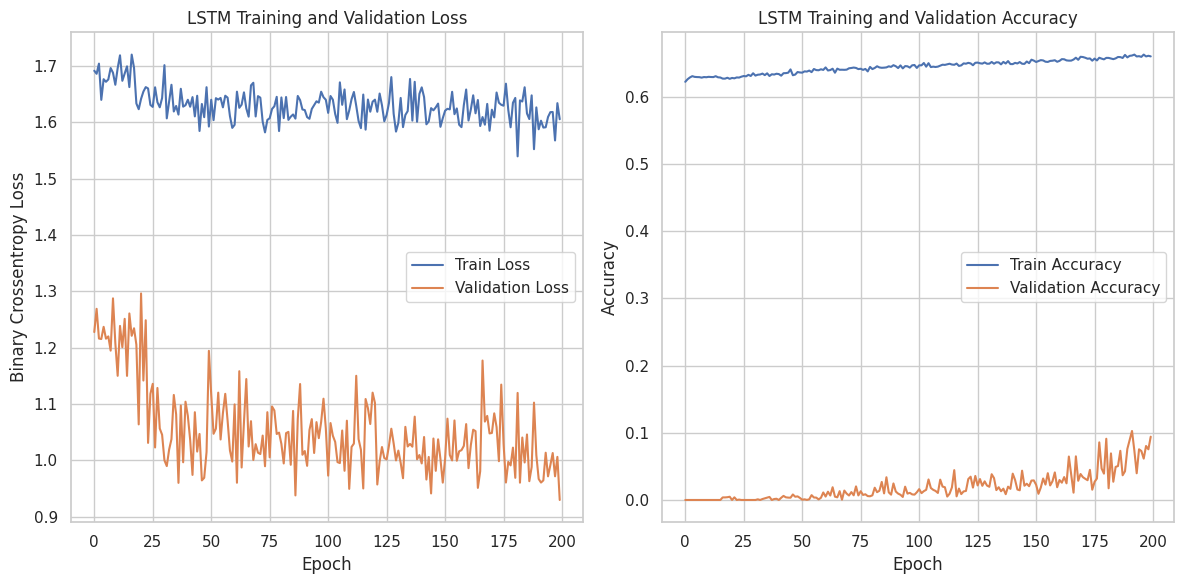

615/615 [==============================] - 5s 9ms/step
Testing Set Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86     15065
           1       0.42      0.08      0.13      4595

    accuracy                           0.76     19660
   macro avg       0.60      0.52      0.50     19660
weighted avg       0.69      0.76      0.69     19660



In [208]:
# Reshaping the data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Defining the LSTM model with dropout layers
lstm_model = Sequential()
lstm_model.add(LSTM(units=128, activation='sigmoid', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))  # Adding dropout after LSTM layer
lstm_model.add(Dense(units=1, activation='sigmoid'))
lstm_model.add(Dropout(0.2))  # Adding dropout after Dense layer

# Compiling the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model on the training data
lstm_history = lstm_model.fit(X_train_lstm, b_train_smote, epochs=200, batch_size=32, validation_split=0.2)

# Plotting training loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()

# Plotting training accuracy
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Reshaping the testing set for LSTM
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Predictions on the testing set
y_pred_test1 = lstm_model.predict(X_test_lstm)
y_pred_conversion_test1 = (y_pred_test1 > 0.5).astype("int32")

# Classification report for testing set
classification_report_test = classification_report(b_test, y_pred_conversion_test1)
print("Testing Set Classification Report:\n", classification_report_test)


In [210]:
# Reshaping the training set for LSTM evaluation
X_train_lstm_eval = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Predicting on the training set
y_pred_train1 = lstm_model.predict(X_train_lstm_eval)
y_pred_conversion_train1 = (y_pred_train1 > 0.5).astype("int32")

# Classification report for training set
classification_report_train = classification_report(b_train_smote, y_pred_conversion_train1)
print("Training Set Classification Report:\n", classification_report_train)

# Reshaping the validation set for LSTM evaluation
X_val_lstm = X_encoded_val.reshape((X_encoded_val.shape[0], X_encoded_val.shape[1], 1))

# Predicting on the validation set
y_pred_val1 = lstm_model.predict(X_val_lstm)
y_pred_conversion_val1 = (y_pred_val1 > 0.5).astype("int32")

# Classification report for validation set
classification_report_val = classification_report(b_val, y_pred_conversion_val1)
print("Validation Set Classification Report:\n", classification_report_val)

# Classification report for testing set
classification_report_test = classification_report(b_test, y_pred_conversion_test1)
print("testing Set Classification Report:\n", classification_report_test)

1104/1104 [==============================] - 17s 15ms/step
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.97      0.67     17663
           1       0.75      0.10      0.17     17663

    accuracy                           0.53     35326
   macro avg       0.63      0.53      0.42     35326
weighted avg       0.63      0.53      0.42     35326

717/717 [==============================] - 10s 13ms/step
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81     17710
           1       0.27      0.19      0.23      5227

    accuracy                           0.70     22937
   macro avg       0.52      0.52      0.52     22937
weighted avg       0.66      0.70      0.68     22937

testing Set Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86     15065
         

In [243]:
# Calculating metrics
accuracy_lstm = accuracy_score(b_test, y_pred_conversion_test1)
precision_lstm = precision_score(b_test, y_pred_conversion_test1)
recall_lstm = recall_score(b_test, y_pred_conversion_test1)
f1_lstm = f1_score(b_test, y_pred_conversion_test1)

# Displaying metrics
print("Accuracy (LSTM):", accuracy_lstm)
print("Precision (LSTM):", precision_lstm)
print("Recall (LSTM):", recall_lstm)
print("F1 Score (LSTM):", f1_lstm)

Accuracy (LSTM): 0.7591556459816887
Precision (LSTM): 0.41784037558685444
Recall (LSTM): 0.07747551686615888
F1 Score (LSTM): 0.13071415458050303


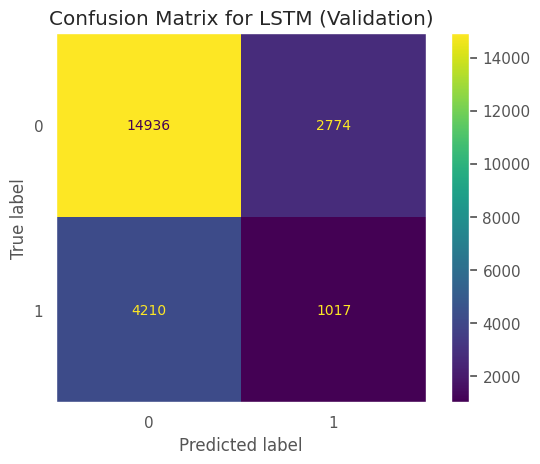

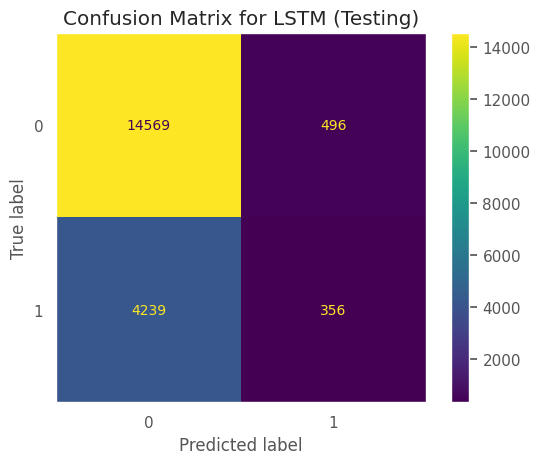

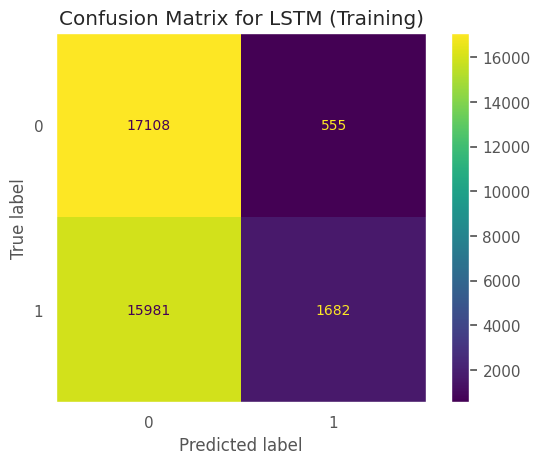

In [244]:
# Plotting Confusion Matrices
# Confusion matrix for validation data
confusion_val5 = confusion_matrix(b_val, y_pred_conversion_val1)
display_val5 = ConfusionMatrixDisplay(confusion_matrix=confusion_val5)

# Plotting the confusion matrix for validation data
display_val5.plot()
plt.title('Confusion Matrix for LSTM (Validation)')
plt.grid(False)
plt.show()

# Confusion matrix for testing data
confusion_test5 = confusion_matrix(b_test, y_pred_conversion_test1)
display_test5 = ConfusionMatrixDisplay(confusion_matrix=confusion_test5)

# Plotting the confusion matrix for testing data
display_test5.plot()
plt.title('Confusion Matrix for LSTM (Testing)')
plt.grid(False)
plt.show()

# Confusion matrix for training data
confusion_train5 = confusion_matrix(b_train_smote, y_pred_conversion_train1)
display_train5 = ConfusionMatrixDisplay(confusion_matrix=confusion_train5)

# Plotting the confusion matrix for training data
display_train5.plot()
plt.title('Confusion Matrix for LSTM (Training)')
plt.grid(False)
plt.show()


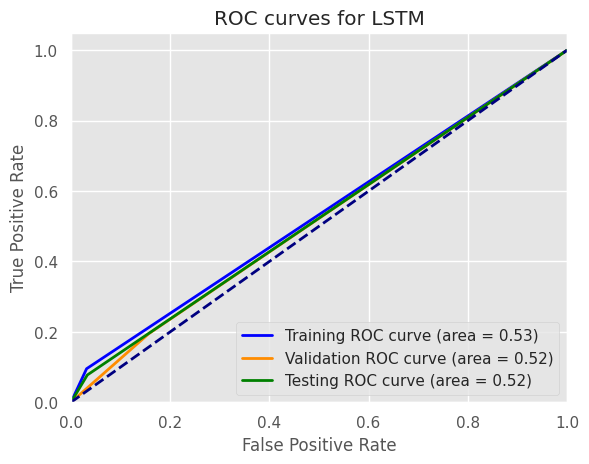

In [245]:
#Plotting AUC-ROC Curve
# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for training set
fpr_train5, tpr_train5, thresholds_train5 = roc_curve(b_train_smote, y_pred_conversion_train1)
roc_auc_train5 = auc(fpr_train5, tpr_train5)

# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for validation set
fpr_val5, tpr_val5, thresholds_val5 = roc_curve(b_val, y_pred_conversion_val1)
roc_auc_val5 = auc(fpr_val5, tpr_val5)

# Calculating the False Positive Rate (fpr) and True Positive Rate (tpr) for testing set
fpr_test5, tpr_test5, thresholds_test5 = roc_curve(b_test, y_pred_conversion_test1)
roc_auc_test5 = auc(fpr_test5, tpr_test5)

# Plotting ROC curves for all three sets
plt.figure()
plt.plot(fpr_train5, tpr_train5, color='blue', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train5)
plt.plot(fpr_val5, tpr_val5, color='darkorange', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val5)
plt.plot(fpr_test5, tpr_test5, color='green', lw=2, label='Testing ROC curve (area = %0.2f)' % roc_auc_test5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for LSTM')
plt.legend(loc="lower right")
plt.show()

# **Comparing Machine Learning Models**

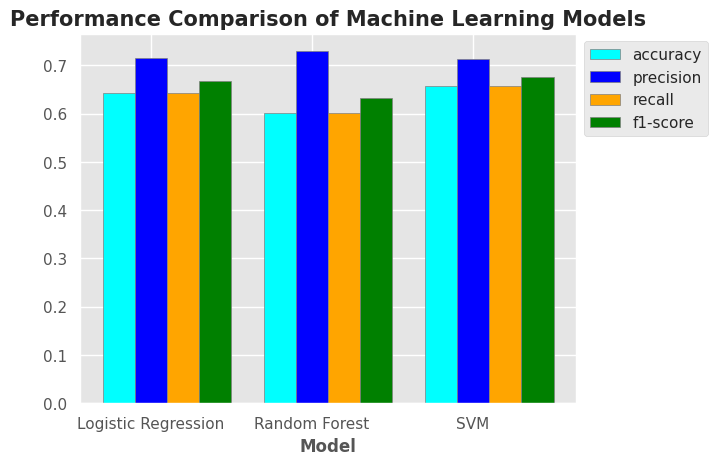

In [246]:
# Replacing these with actual classification reports
classification_reports = {
    'Logistic Regression': classification_report(b_test, y_test_pred, output_dict=True),
    'Random Forest': classification_report(b_test, b_test_pred, output_dict=True),
    'SVM': classification_report(b_test, b_test_pred2, output_dict=True),
}

# Defining metrics and colors
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
colors = ['cyan', 'blue', 'orange', 'green']

# Setting the style
plt.style.use('ggplot')

# Plotting the grouped bar plot
barWidth = 0.2
models = list(classification_reports.keys())
r = np.arange(len(models))

for i, metric in enumerate(metrics):
    if metric == 'accuracy':
        values = [report[metric] for report in classification_reports.values()]
    else:
        values = [report['weighted avg'][metric] for report in classification_reports.values()]

    plt.bar(r + i * barWidth, values, color=colors[i], width=barWidth, edgecolor='grey', label=metric)

# Adding labels
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)
plt.title('Performance Comparison of Machine Learning Models', fontweight='bold', fontsize=15)

# Adding legend outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Showing the plot
plt.show()


# **Comparing Deep Learning Models**

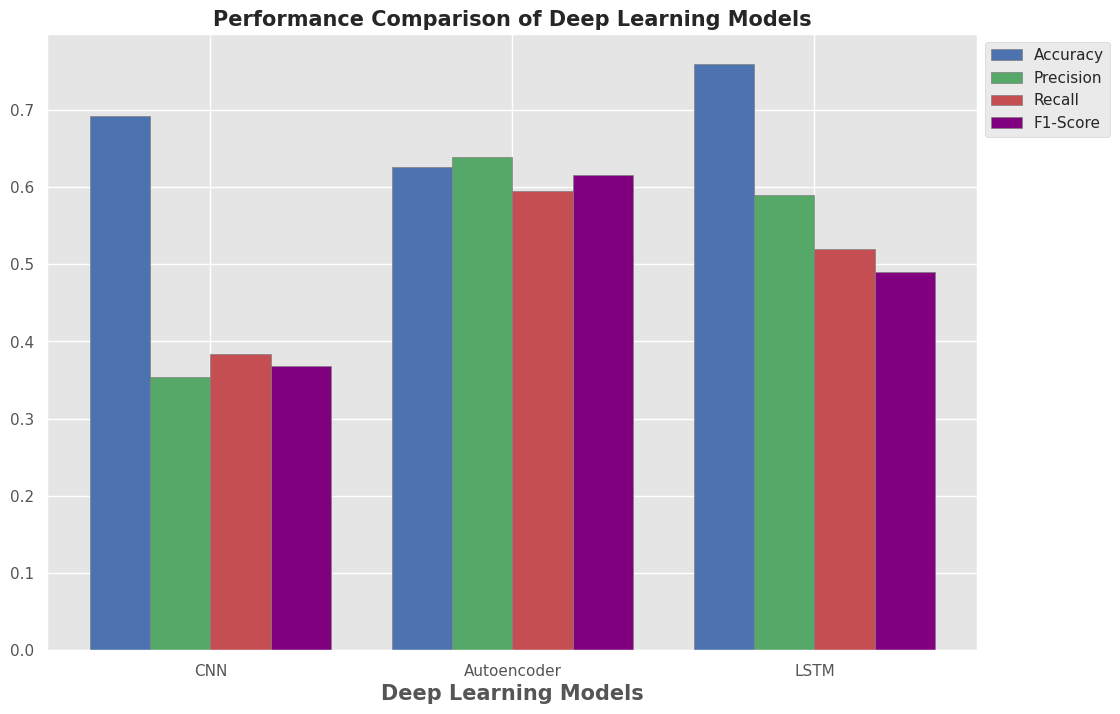

In [252]:
import matplotlib.pyplot as plt
import numpy as np

# Replace the following variables with your actual model names and metrics
deep_learning_models = ['CNN', 'Autoencoder', 'LSTM']
accuracy_values = [0.692, 0.626, 0.76]  # Replace these values with your actual accuracy values
precision_values = [0.354, 0.639, 0.59]  # Replace these values with your actual precision values
recall_values = [0.384, 0.595, 0.52]  # Replace these values with your actual recall values
f1_values = [0.368, 0.616, 0.49]  # Replace these values with your actual F1-Score values

barWidth = 0.2  # Adjust this value to reduce the gap
r = np.arange(len(deep_learning_models))

plt.figure(figsize=(12, 8))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy_values, precision_values, recall_values, f1_values]
colors = ['b', 'g', 'r', 'purple']

for i, metric in enumerate(metrics):
    plt.bar(r + i * barWidth, values[i], color=colors[i], width=barWidth, edgecolor='grey', label=metric)

# Set x-axis labels and title
plt.xlabel('Deep Learning Models', fontweight='bold', fontsize=15)
plt.xticks(r + 1.5 * barWidth, deep_learning_models)
plt.title('Performance Comparison of Deep Learning Models', fontweight='bold', fontsize=15)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
